<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
# чтение файла с данными и сохранение в df_init
path = 'input/'
df_init = pd.read_csv(path + 'prj_03_real_estate_data.csv', sep='\t')

In [3]:
df_init.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` —  высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` —  сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` —  дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [4]:
# получение общей информации о данных в таблице df
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# пропущенные значения бары
def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );  

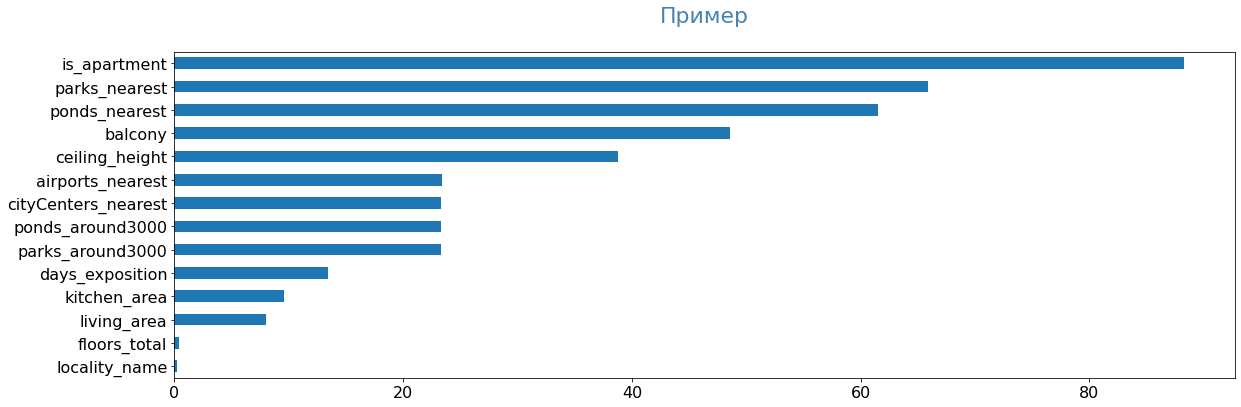

In [6]:
pass_value(df_init)

### Вывод

В каждой строке таблицы — данные о квартире из объявлений о продаже. 

В таблице представленны данные, которые можно разделить на три основные группы: 

- Первая группа - это данные, описывающие характериститки самой квартиры: площадь, число комнат, наличие балока, высота потолков и т.д).
- Вторая группа - это данные о местоположении квартиры: населенный пункт, расстояние до аэропорта, центра города, растояние до парков и т.д.
- Третья группа - дата публикации, время размещения объявления, стоимость на момент снятия объявления.

Проанализировав эти данных, можно спрогназировать стоимости жилья для нового объекта, имея его характеристики (дата выставления на продажу, характеристики квартиры и местоположение).

Из описания таблицы, видно, что в таблице имеются пропуски данных. Изучим наличие пропусков и аномалий в каждом столбце.

## Предобработка данных

In [7]:
# Создадим копию исходной таблицы и будем с ней работать
df = df_init.copy()

In [8]:
# Список названий колонок
column_list = list(df.columns)
column_list

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Сменим порядок колонок в исходной таблице, чтобы в первой части были характеристики квартиры, во второй - географическое положение, в конце- даты и стоимость

In [9]:
# Список названий колонок в нужном порядке
column_order = ['rooms','total_area', 'living_area', 'kitchen_area', 'studio', 'open_plan', 'floor', 
                'floors_total', 'balcony', 'ceiling_height', 'is_apartment','total_images',
                 'locality_name',  'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
                 'parks_nearest',  'ponds_around3000', 'ponds_nearest',
                 'first_day_exposition', 'days_exposition',  'last_price']

In [10]:
# Обновим порядок колонок в таблице
df = df[column_order]

In [11]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
0,3,108.0,51.0,25.0,False,False,8,16.0,NaN,2.70,NaN,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0
1,1,40.4,18.6,11.0,False,False,1,11.0,2.0,NaN,NaN,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0
2,2,56.0,34.3,8.3,False,False,4,5.0,0.0,NaN,NaN,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0
3,3,159.0,NaN,NaN,False,False,9,14.0,0.0,NaN,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0
4,2,100.0,32.0,41.0,False,False,13,14.0,NaN,3.03,NaN,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0


In [12]:
# Функция для анализа данных в колонках
def data_analysis(column_name):
    print()
    print('-'*40)
    print(f'Анализ данных в колонке {column_name}')
    print('-'*40)
    print(f'Тип данных в колонке: {df[column_name].dtype}')
    data_0 = len(df[df[column_name].isnull()==True])
    print(f'Количество отсутствующих значений в столбце: {data_0}')
    print(f'Процент отсутствующих значений: {data_0/len(df):.1%}')
    print(f'Число уникальных данных: {len(df[column_name].unique())}')
    if len(df[column_name].unique()) < 40:
        print(f'Уникальные значения: {df[column_name].unique()}')
    else:
        print('Число уникальных значений слишком велико для вывода')
    print('Описание данных в колонке:')
    display(df[column_name].describe())          

In [13]:
# Изучим данные в колонке 'rooms'
data_analysis('rooms')


----------------------------------------
Анализ данных в колонке rooms
----------------------------------------
Тип данных в колонке: int64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 17
Уникальные значения: [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
Описание данных в колонке:


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

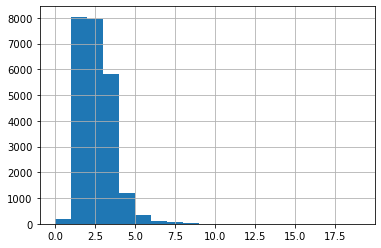

In [14]:
# Построим гистограмму
df['rooms'].hist(bins=max(df['rooms']));

In [15]:
# Посмотрим количество объектов по уникальным значениям колонки 'rooms'
df['rooms'].value_counts().sort_index().to_frame().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
rooms,197,8047,7940,5814,1180,326,105,59,12,8,3,2,1,2,1,1,1


In [16]:
# Изучим объекты с количеством комнат, равным 0
df_r0 = df.query('rooms == 0')

In [17]:
df_r0.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
144,0,27.00,15.50,NaN,True,False,2,24.0,2.0,NaN,NaN,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30T00:00:00,181.0,2450000.0
349,0,25.00,17.00,NaN,False,True,1,14.0,0.0,NaN,NaN,4,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-27T00:00:00,45.0,2320000.0
440,0,27.11,24.75,NaN,True,False,4,17.0,2.0,NaN,NaN,8,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,2018-03-12T00:00:00,64.0,2480000.0
508,0,34.40,24.30,NaN,False,True,19,26.0,1.0,NaN,NaN,0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,2017-03-28T00:00:00,430.0,3375000.0
608,0,25.00,NaN,NaN,True,False,7,10.0,NaN,NaN,NaN,2,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-20T00:00:00,29.0,1850000.0


In [18]:
# Посмотрим сведения о таблице количество комнат, равынм 0
df_r0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 197 non-null    int64  
 1   total_area            197 non-null    float64
 2   living_area           183 non-null    float64
 3   kitchen_area          0 non-null      float64
 4   studio                197 non-null    bool   
 5   open_plan             197 non-null    bool   
 6   floor                 197 non-null    int64  
 7   floors_total          194 non-null    float64
 8   balcony               126 non-null    float64
 9   ceiling_height        82 non-null     float64
 10  is_apartment          6 non-null      object 
 11  total_images          197 non-null    int64  
 12  locality_name         197 non-null    object 
 13  airports_nearest      118 non-null    float64
 14  cityCenters_nearest   118 non-null    float64
 15  parks_around3000   

In [19]:
# Описание данных в колонке 'total_area'
df_r0['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

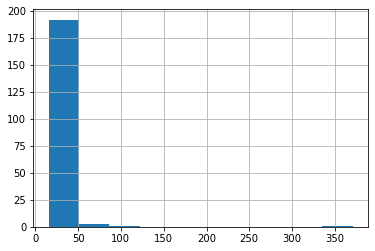

In [20]:
# Посмотрим гистограмму общей площади для объявлений с количеством комнат = 0
df_r0['total_area'].hist();

Из гистограммы видно, что большенство объектов с количеством комнат 0 имеют площадь менее 50 м**2

In [21]:
# Посмотрим сколько квартир студий в таблице, где представленны только объекты с количеством комнат = 0 
# Построим сводную таблицу
df[df['rooms']==0].pivot_table(index='rooms', columns='studio', values='total_area', aggfunc='count')

studio,False,True
rooms,,
0,59,138


Получается, что большенство объектов, с количеством комнат = 0, являются квартирами-студиями. 

Посмотрим, сколько комнат указано у объектов, отмеченных как студии и количеством комнат больше 0.

In [22]:
# Построим таблицу для объктов, где количество комнат больше 0 и являющимися квартирами-студиями
df_s = df.query('studio == True & rooms !=0')

In [23]:
df_s

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
2389,1,25.41,17.08,NaN,True,False,8,12.0,2.0,NaN,False,5,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,2016-06-07T00:00:00,26.0,2250000.0
3187,1,27.00,18.00,NaN,True,False,8,14.0,2.0,NaN,False,13,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,2016-05-17T00:00:00,45.0,3800000.0
4180,1,34.00,21.00,NaN,True,False,10,10.0,2.0,2.8,False,4,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,2016-04-25T00:00:00,62.0,4500000.0
8683,1,32.50,29.90,NaN,True,False,11,23.0,2.0,3.0,False,10,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,2016-05-05T00:00:00,45.0,3500000.0
11026,1,28.00,19.00,NaN,True,False,6,26.0,2.0,NaN,False,1,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,2016-05-04T00:00:00,45.0,2800000.0
12935,1,31.00,22.30,NaN,True,False,5,8.0,1.0,2.5,False,10,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-15T00:00:00,44.0,2200000.0
15142,1,30.00,26.00,NaN,True,False,6,21.0,0.0,NaN,False,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-10T00:00:00,55.0,2700000.0
18732,1,22.00,15.00,NaN,True,False,6,10.0,0.0,NaN,NaN,4,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-06T00:00:00,45.0,2400000.0
20086,1,22.00,10.94,NaN,True,False,14,15.0,2.0,2.7,False,0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-11T00:00:00,45.0,1550000.0
21702,1,23.40,16.00,NaN,True,False,8,20.0,1.0,2.7,False,9,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-19T00:00:00,34.0,2349000.0


In [24]:
# количество объектов являющимися квартирами-студиями и колличеством комнта больше 0
len(df_s)

11

Получается, что одних объектов, отмеченных как квартира-студия указано 1 комната, а для других - 0.

Приведем данные к одному виду: если объект указан как квартира-студия, то количество комнат равно 1. Исправим таблицу, где это не так

In [25]:
# Обновим данные в таблице. Присвоим количесвто комнат =1 объктам, указанным как квартира-студия
df.loc[df['studio'] == True, 'rooms'] = 1

In [26]:
# Посмотрим количество объектов по уникальным значениям колонки 'rooms' после обновления данных
df['rooms'].value_counts().sort_index()

0       59
1     8185
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Осталось 59 объктов с количеством комнат, равных 0. Оставим эти данные без изменения. 
Теперь посмотрим объекты с большим количеством комнат: больше 9

In [27]:
df_r10 = df.query('rooms > 9')

In [28]:
df_r10

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
648,11,183.7,138.8,13.3,False,False,7,7.0,NaN,3.40,NaN,3,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,2018-07-01T00:00:00,NaN,17500000.0
866,14,363.0,222.0,16.6,False,False,4,5.0,NaN,3.16,NaN,5,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,2017-12-23T00:00:00,418.0,25000000.0
4149,10,272.6,145.9,18.8,False,False,7,7.0,1.0,3.14,NaN,6,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,2018-01-11T00:00:00,NaN,23000000.0
5358,15,590.0,409.0,100.0,False,False,3,6.0,NaN,3.50,NaN,20,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,2019-02-14T00:00:00,14.0,65000000.0
9688,11,194.1,129.0,11.9,False,False,2,5.0,NaN,3.43,NaN,8,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,2017-02-07T00:00:00,813.0,33000000.0
14498,19,374.6,264.5,27.6,False,False,2,5.0,NaN,NaN,NaN,6,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,2018-06-09T00:00:00,114.0,32250000.0
18119,10,216.1,161.4,19.8,False,False,2,5.0,0.0,3.15,NaN,4,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,2016-07-04T00:00:00,11.0,15500000.0
18848,16,270.0,180.0,13.0,False,False,4,4.0,1.0,3.00,NaN,6,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,2015-03-02T00:00:00,1365.0,28500000.0
18891,10,290.0,189.4,30.0,False,False,6,6.0,1.0,3.50,NaN,11,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,2016-06-21T00:00:00,77.0,40000000.0
19540,12,900.0,409.7,112.0,False,False,25,25.0,NaN,2.80,NaN,8,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,2017-12-06T00:00:00,106.0,420000000.0


In [29]:
# Добавим колонку средней площади комнаты (для поиска аномалии)
df_r10.insert(4, "total_area/rooms",(df_r10['total_area']/df_r10['rooms']))

In [30]:
df_r10

,rooms,total_area,living_area,kitchen_area,total_area/rooms,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
648,11,183.7,138.8,13.3,16.700000,False,False,7,7.0,NaN,3.40,NaN,3,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,2018-07-01T00:00:00,NaN,17500000.0
866,14,363.0,222.0,16.6,25.928571,False,False,4,5.0,NaN,3.16,NaN,5,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,2017-12-23T00:00:00,418.0,25000000.0
4149,10,272.6,145.9,18.8,27.260000,False,False,7,7.0,1.0,3.14,NaN,6,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,2018-01-11T00:00:00,NaN,23000000.0
5358,15,590.0,409.0,100.0,39.333333,False,False,3,6.0,NaN,3.50,NaN,20,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,2019-02-14T00:00:00,14.0,65000000.0
9688,11,194.1,129.0,11.9,17.645455,False,False,2,5.0,NaN,3.43,NaN,8,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,2017-02-07T00:00:00,813.0,33000000.0
14498,19,374.6,264.5,27.6,19.715789,False,False,2,5.0,NaN,NaN,NaN,6,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,2018-06-09T00:00:00,114.0,32250000.0
18119,10,216.1,161.4,19.8,21.610000,False,False,2,5.0,0.0,3.15,NaN,4,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,2016-07-04T00:00:00,11.0,15500000.0
18848,16,270.0,180.0,13.0,16.875000,False,False,4,4.0,1.0,3.00,NaN,6,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,2015-03-02T00:00:00,1365.0,28500000.0
18891,10,290.0,189.4,30.0,29.000000,False,False,6,6.0,1.0,3.50,NaN,11,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,2016-06-21T00:00:00,77.0,40000000.0
19540,12,900.0,409.7,112.0,75.000000,False,False,25,25.0,NaN,2.80,NaN,8,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,2017-12-06T00:00:00,106.0,420000000.0


In [31]:
df_r10['total_area/rooms'].describe()

count    11.000000
mean     27.872429
std      17.090603
min      16.700000
25%      17.587013
50%      21.610000
75%      28.130000
max      75.000000
Name: total_area/rooms, dtype: float64

In [32]:
# Проверим кол-во объектов с числом комнат больше 9
len(df.query('rooms > 9'))

11

In [33]:
print(f'Процент объектов с кол-вом комнат более 9: {len(df.query("rooms > 9"))/len(df):.3%}')

Процент объектов с кол-вом комнат более 9: 0.046%


Средний размер комнаты у объектов с кол-вом комнат более 9 не выглядит аномальным. Однако, кол-во таких объектов не велико - всего 0,05%, поэтому удалим эти объекты

In [34]:
df=df.query('rooms<9')

In [35]:
df['rooms'].describe()

count    23680.000000
mean         2.069088
std          1.034948
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

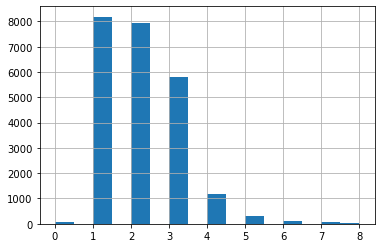

In [36]:
# Построим гистограмму
df['rooms'].hist(bins=2*max(df['rooms']));

Выводы по колонке 'rooms':

Пропусков в данных нет.
Аномалии не обнаружены: есть объекты с количеством комнат, равным 0, однако, это не аномалия, а одна из характеристик объекта. Скорее всего, такие объекты не являются квартирами, а являются отдельными комнатами, выставленными на продажу или дачный домик.
Была произведена корректировка по количеству комнат для объектов, обозначенных как квартира-студия (исправлено значение количества комнат с 0 на 1). Объекты с кол-вом комнат более 9 был удалены


In [37]:
# Изучим данные в колонке 'total_area'
data_analysis('total_area')


----------------------------------------
Анализ данных в колонке total_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2168
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23680.000000
mean        60.129028
std         34.511850
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

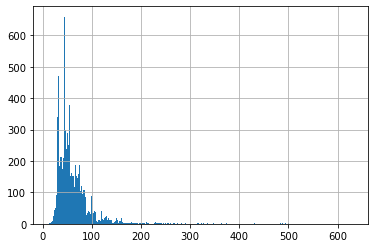

In [38]:
# Построим гистограмму
df['total_area'].hist(bins=900);

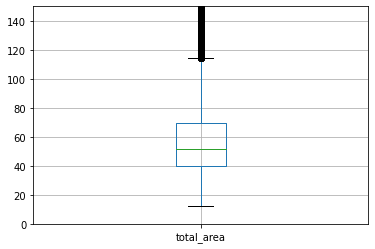

In [39]:
## Построим ящик с усами
df.boxplot(column=['total_area']);
plt.ylim(0,150);

Пропусков нет, большая часть объектов имеет общую площадь меньше 70 кв.м.

In [40]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 1902
Процент отсутствующих значений: 8.0%
Число уникальных данных: 1767
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    21778.000000
mean        34.314150
std         21.342052
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

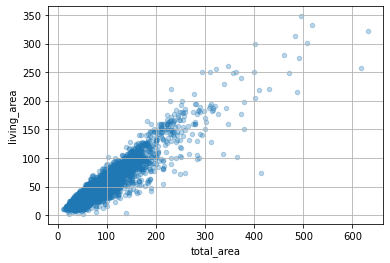

In [41]:
#Посмотрим зависимость жилой площади от общей
df.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3,grid=True);

Из графика видно, что корреляция положительная и это логично.

In [42]:
# Проверим аномалии : есть ли объекты, где жилая площадь больше общей
df.query('living_area >= total_area')

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
9861,0,25.0,25.0,NaN,False,True,17,22.0,2.0,NaN,NaN,10,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-03T00:00:00,13.0,2350000.0
12691,0,24.2,24.2,NaN,False,True,13,19.0,1.0,NaN,NaN,1,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,2017-11-10T00:00:00,74.0,3700000.0


Есть всего два объекта, у которых жилая и общая площадь равны. Аномалий, что общая площадь меньше жилой - нет

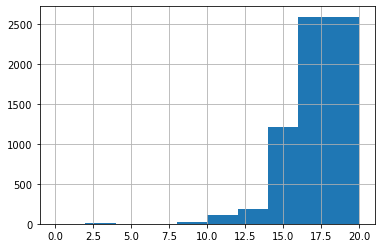

In [43]:
# Построим гистограмму для объектов с жилой площадью от 0 до 20 кв.м
df['living_area'].hist(range=(0,20));

Жилая площадь менее 10 кв.м выглядит подозрительно
Посмотрим на объекты с маленькой жилой площадью (менее 10 кв.м)

In [44]:
# Отфильтруем таблицу по условию: жилая площадь менее 10 кв.м и числом комнат больше одной
df.query('living_area<10 and rooms>1')

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1326,2,52.00,9.0,32.0,False,False,15,25.0,2.0,2.7,NaN,8,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,2017-01-29T00:00:00,337.0,8100000.0
2309,2,62.40,8.4,41.0,False,False,6,9.0,2.0,2.6,NaN,10,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,2017-06-15T00:00:00,111.0,4200000.0
7312,2,27.00,9.0,16.0,False,False,4,15.0,NaN,2.5,NaN,8,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,2018-02-21T00:00:00,NaN,3400000.0
8325,2,52.00,9.0,6.0,False,False,2,5.0,1.0,NaN,NaN,9,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,2017-10-25T00:00:00,119.0,4800000.0
13915,2,52.00,2.0,9.0,False,False,2,6.0,NaN,3.0,NaN,20,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,2018-02-06T00:00:00,91.0,6350000.0
20994,2,50.60,8.0,31.0,False,False,3,7.0,NaN,2.5,NaN,7,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,2018-10-22T00:00:00,NaN,8900000.0
21943,4,77.60,5.4,9.8,False,False,1,9.0,NaN,2.5,NaN,15,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,2019-02-28T00:00:00,33.0,6100000.0
22473,2,33.26,9.1,16.4,False,False,9,13.0,0.0,NaN,NaN,0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,2015-12-22T00:00:00,199.0,3490304.0
23574,3,139.00,3.0,16.0,False,False,8,8.0,1.0,3.0,NaN,14,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,2015-11-24T00:00:00,280.0,64990000.0


Площадь жилых комнат менее 10 кв.м для многокомнатных квартир - выглядит аномально. Возможно, здесь есть опечатка - перепутали площадь кухни с площадью жилых комнат. Или вписали число комнат вместо площади жилых комнат (для объекта с общей площадью =139 кв.м)
Посмотрим на однокомнатные объекты, где жилая площадь менее 10 кв.м

In [45]:
# Отфильтруем таблицу по условию: жилая площадь менее 10 кв.м и числом комнат больше одной
df.query('living_area<10 and rooms<=1').head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
114,1,21.4,8.3,6.3,False,False,7,8.0,NaN,2.9,NaN,5,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,2019-02-07T00:00:00,NaN,4000000.0
680,1,43.0,9.0,23.0,False,False,2,8.0,NaN,NaN,NaN,14,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,2017-10-31T00:00:00,296.0,7200000.0
3242,1,41.0,3.0,11.0,False,False,17,17.0,NaN,NaN,NaN,7,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,2017-07-02T00:00:00,216.0,4440000.0
4100,1,34.8,9.0,17.1,False,False,15,23.0,0.0,2.7,NaN,17,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,2017-06-19T00:00:00,30.0,5300000.0
4542,1,18.0,9.0,NaN,False,False,2,5.0,NaN,3.5,NaN,12,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,2018-11-07T00:00:00,9.0,3300000.0


Заменим аномально маленькие значения площади жилых комнат на медианные значения аналогичных объектов.
Но сначала заполним пропуски в колонке 'living_area'

Первым шагом заменим пропуски медианными значениями объектов с совпадающим числом комнат и местоположеним и отличающейся общей площадью на +- 1 кв.м

In [46]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    location = row['locality_name']
    try:
        if pd.isnull(row['living_area']):  
            up_value = total_area + 1
            down_value = total_area - 1
            median_lr = df[(df['rooms']==row['rooms'])&
                           (df['locality_name']==location)&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [47]:
# заменим значения в колонке 'living_area' на новые
df['living_area'] = median_liv_area

In [48]:
# Изучим данные в колонке 'living_area' после обновления
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 287
Процент отсутствующих значений: 1.2%
Число уникальных данных: 1896
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23393.000000
mean        34.261282
std         21.284281
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

Осталось 287 строки с пустыми данными. Изучим их

In [49]:
df[df['living_area'].isnull()==True]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
37,2,45.8,NaN,NaN,False,False,1,5.0,NaN,2.50,NaN,10,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-28T00:00:00,196.0,1990000.0
164,2,40.3,NaN,NaN,False,False,1,3.0,2.0,NaN,NaN,6,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-25T00:00:00,81.0,800000.0
166,2,60.0,NaN,NaN,False,False,1,3.0,NaN,NaN,NaN,0,посёлок Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02T00:00:00,45.0,2300000.0
227,3,47.0,NaN,NaN,False,False,1,5.0,NaN,2.34,NaN,13,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12T00:00:00,45.0,2200000.0
500,2,42.0,NaN,NaN,False,False,2,4.0,NaN,NaN,NaN,14,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-19T00:00:00,266.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23214,2,56.0,NaN,NaN,False,False,5,6.0,0.0,NaN,False,3,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,2016-05-31T00:00:00,70.0,7990000.0
23413,2,73.0,NaN,NaN,False,False,13,16.0,1.0,2.70,False,18,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21T00:00:00,566.0,6350000.0
23423,2,48.0,NaN,9.0,False,False,5,5.0,1.0,2.75,NaN,8,поселок городского типа Приладожский,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-29T00:00:00,391.0,2450000.0
23584,3,66.0,NaN,8.0,False,False,1,5.0,NaN,NaN,NaN,17,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-03T00:00:00,NaN,2450000.0


Теперь заполним оставшиеся пропуски медианными значениями объектов с совпадающим числом комнат отличающейся общей площадью на +-1 кв.м (без учета местоположения)

In [50]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['living_area']):
            up_value = total_area + 1
            down_value = total_area - 1
            median_lr = df[(df['rooms']==row['rooms'])&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [51]:
# заменим значения в колонке 'living_area' на новые
df['living_area'] = median_liv_area

In [52]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 36
Процент отсутствующих значений: 0.2%
Число уникальных данных: 1913
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23644.000000
mean        34.287621
std         21.309680
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

In [53]:
df[df['living_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1126,1,96.50,NaN,NaN,False,False,6,10.0,NaN,2.60,NaN,2,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06T00:00:00,57.0,8300000.0
1388,5,399.00,NaN,NaN,False,False,6,6.0,0.0,5.60,NaN,20,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,59800000.0
2127,5,234.00,NaN,NaN,False,False,6,7.0,0.0,NaN,NaN,14,Санкт-Петербург,23987.0,4554.0,1.0,320.0,0.0,NaN,2016-05-26T00:00:00,180.0,32500000.0
2243,5,304.00,NaN,NaN,False,False,7,9.0,0.0,3.11,NaN,9,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,2015-07-24T00:00:00,599.0,130278280.0
2709,6,197.00,NaN,NaN,False,False,2,6.0,NaN,3.00,NaN,14,Санкт-Петербург,24836.0,4403.0,2.0,566.0,0.0,NaN,2018-07-04T00:00:00,NaN,21500000.0
2756,5,196.00,NaN,NaN,False,False,4,4.0,NaN,2.80,NaN,1,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,2018-08-07T00:00:00,107.0,13040000.0
3676,4,441.98,NaN,35.05,False,False,6,6.0,NaN,NaN,NaN,12,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,2019-01-23T00:00:00,NaN,28789000.0
3806,5,156.00,NaN,NaN,False,False,3,3.0,NaN,3.40,NaN,7,Санкт-Петербург,26683.0,6188.0,0.0,NaN,1.0,640.0,2017-02-16T00:00:00,316.0,13200000.0
4323,2,160.00,NaN,NaN,False,False,5,10.0,NaN,NaN,NaN,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-19T00:00:00,NaN,25476800.0
5112,2,112.00,NaN,NaN,False,False,8,8.0,1.0,3.00,NaN,9,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,2019-01-24T00:00:00,NaN,16900000.0


Теперь заполним оставшиеся пропуски для объектов с числом комнат больше 1 медианными значениями объектов отличающейся общей площадью на +1 кв.м и +5кв.м, 

In [54]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['living_area'])&(row['rooms']>1): 
            up_value = total_area + 1
            down_value = total_area - 5
            median_lr = df[((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [55]:
df['living_area'] = median_liv_area

In [56]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 10
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1918
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23670.000000
mean        34.374865
std         21.522933
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

In [57]:
df[df['living_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1126,1,96.50,NaN,NaN,False,False,6,10.0,NaN,2.60,NaN,2,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06T00:00:00,57.0,8300000.0
1388,5,399.00,NaN,NaN,False,False,6,6.0,0.0,5.60,NaN,20,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,59800000.0
3676,4,441.98,NaN,35.05,False,False,6,6.0,NaN,NaN,NaN,12,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,2019-01-23T00:00:00,NaN,28789000.0
5893,6,500.00,NaN,40.00,False,False,7,7.0,0.0,NaN,NaN,3,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,2017-05-31T00:00:00,50.0,230000000.0
9826,1,494.10,NaN,NaN,False,False,3,12.0,0.0,2.85,NaN,1,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,2017-05-12T00:00:00,5.0,43185328.0
15016,4,500.00,NaN,NaN,False,False,7,7.0,0.0,3.20,NaN,8,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,2016-01-13T00:00:00,303.0,150000000.0
18948,1,91.60,NaN,NaN,False,False,3,24.0,NaN,2.80,NaN,0,Санкт-Петербург,52212.0,16802.0,0.0,NaN,1.0,733.0,2019-01-10T00:00:00,6.0,7115634.0
19392,0,371.00,NaN,NaN,False,True,6,7.0,NaN,3.57,NaN,5,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,2018-07-26T00:00:00,90.0,71000000.0
21276,1,178.30,NaN,41.60,False,False,1,3.0,1.0,NaN,NaN,0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,2017-02-10T00:00:00,4.0,17122148.0
22131,5,422.20,NaN,NaN,False,False,11,13.0,NaN,2.70,NaN,14,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,2018-10-18T00:00:00,NaN,27000000.0


In [58]:
# индекс строки по условию
ind = df.loc[(df.loc[:,'rooms']==0)&(df.loc[:,'total_area']==371)]['total_area'].index[0]

In [59]:
# присвоение значения из колонки total_area клонке 'living_area'
df.loc[ind,'living_area'] = df.at[ind,'total_area']

In [60]:
# посмотрим на строку после изменения
df.loc[(df.loc[:,'rooms']==0)&(df.loc[:,'total_area']==371)]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
19392,0,371.0,371.0,NaN,False,True,6,7.0,NaN,3.57,NaN,5,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,2018-07-26T00:00:00,90.0,71000000.0


In [61]:
df[df['living_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1126,1,96.50,NaN,NaN,False,False,6,10.0,NaN,2.60,NaN,2,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06T00:00:00,57.0,8300000.0
1388,5,399.00,NaN,NaN,False,False,6,6.0,0.0,5.60,NaN,20,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,59800000.0
3676,4,441.98,NaN,35.05,False,False,6,6.0,NaN,NaN,NaN,12,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,2019-01-23T00:00:00,NaN,28789000.0
5893,6,500.00,NaN,40.00,False,False,7,7.0,0.0,NaN,NaN,3,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,2017-05-31T00:00:00,50.0,230000000.0
9826,1,494.10,NaN,NaN,False,False,3,12.0,0.0,2.85,NaN,1,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,2017-05-12T00:00:00,5.0,43185328.0
15016,4,500.00,NaN,NaN,False,False,7,7.0,0.0,3.20,NaN,8,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,2016-01-13T00:00:00,303.0,150000000.0
18948,1,91.60,NaN,NaN,False,False,3,24.0,NaN,2.80,NaN,0,Санкт-Петербург,52212.0,16802.0,0.0,NaN,1.0,733.0,2019-01-10T00:00:00,6.0,7115634.0
21276,1,178.30,NaN,41.60,False,False,1,3.0,1.0,NaN,NaN,0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,2017-02-10T00:00:00,4.0,17122148.0
22131,5,422.20,NaN,NaN,False,False,11,13.0,NaN,2.70,NaN,14,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,2018-10-18T00:00:00,NaN,27000000.0


Заполним пропуски для однокомнатных квартир медианным значением объектов с одной комнатой и общей площадью, отличающейся от 0 до -5 кв.м

In [62]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['living_area']):
            up_value = total_area + 0
            down_value = total_area - 5
            median_lr = df[(df['rooms']==row['rooms'])&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [63]:
df['living_area'] = median_liv_area

In [64]:
df[df['living_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1388,5,399.00,NaN,NaN,False,False,6,6.0,0.0,5.60,NaN,20,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,59800000.0
3676,4,441.98,NaN,35.05,False,False,6,6.0,NaN,NaN,NaN,12,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,2019-01-23T00:00:00,NaN,28789000.0
5893,6,500.00,NaN,40.00,False,False,7,7.0,0.0,NaN,NaN,3,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,2017-05-31T00:00:00,50.0,230000000.0
9826,1,494.10,NaN,NaN,False,False,3,12.0,0.0,2.85,NaN,1,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,2017-05-12T00:00:00,5.0,43185328.0
15016,4,500.00,NaN,NaN,False,False,7,7.0,0.0,3.20,NaN,8,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,2016-01-13T00:00:00,303.0,150000000.0
21276,1,178.30,NaN,41.60,False,False,1,3.0,1.0,NaN,NaN,0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,2017-02-10T00:00:00,4.0,17122148.0
22131,5,422.20,NaN,NaN,False,False,11,13.0,NaN,2.70,NaN,14,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,2018-10-18T00:00:00,NaN,27000000.0


Пропуски остались в объектах с большой общей площадью. Заменим их на медианные значения объектов с общей площадью отличающейся в диапазоне от 0 до -15кв.м

In [65]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['living_area']): 
            up_value = total_area + 0
            down_value = total_area - 15
            median_lr = df[((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [66]:
df['living_area'] = median_liv_area

In [67]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 1
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1920
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23679.000000
mean        34.436664
std         21.847765
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        371.000000
Name: living_area, dtype: float64

In [68]:
df[pd.isnull(df['living_area'])]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1388,5,399.0,NaN,NaN,False,False,6,6.0,0.0,5.6,NaN,20,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,59800000.0


Остался один объкт без данных по living_area - удалим его

In [69]:
df.dropna(subset=['living_area'],inplace=True)

In [70]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1919
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23679.000000
mean        34.436664
std         21.847765
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        371.000000
Name: living_area, dtype: float64

Пропусков в колонке 'living_area' больше нет. Теперь вернемся к аномальным значениям. Заменим все аномальные значения на медианные для аналогичных объектов

In [71]:
median_liv_area = []
for index, row in df.iterrows():
    living_area = row['living_area']
    total_area = row['total_area']
    location = row['locality_name']
    try:
        if row['living_area']<10:  
            up_value = total_area + 1
            down_value = total_area - 1
            median_lr = df[(df['rooms']==row['rooms'])&
                           (df['locality_name']==location)&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['living_area'].median()
            median_liv_area.append(median_lr)
        else:
            median_lr = living_area
            median_liv_area.append(median_lr)
    except:
        median_lr = living_area
        median_liv_area.append(median_lr)

In [72]:
df['living_area'] = median_liv_area

In [73]:
# Изучим данные в колонке 'living_area'
data_analysis('living_area')


----------------------------------------
Анализ данных в колонке living_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1907
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23679.000000
mean        34.453633
std         21.838064
min          9.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        371.000000
Name: living_area, dtype: float64

Выводы: все пропуски в колонке 'living_area' были заполнены. Аномальные значения - обработаны.

Изучим данные в колонке 'kitchen_area'

In [74]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 2276
Процент отсутствующих значений: 9.6%
Число уникальных данных: 968
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    21403.000000
mean        10.552326
std          5.818651
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Заполним пропуски по аналогии с заполнением пропусков в колонке living_area

In [75]:
median_kit_area = []
for index, row in df.iterrows():
    kit_area = row['kitchen_area']
    total_area = row['total_area']
    location = row['locality_name']
    try:
        if pd.isnull(row['kitchen_area']):  
            up_value = total_area + 1
            down_value = total_area - 1
            median_lr = df[(df['rooms']==row['rooms'])&
                           (df['locality_name']==location)&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['kitchen_area'].median()
            median_kit_area.append(median_lr)
        else:
            median_lr = kit_area
            median_kit_area.append(median_lr)
    except:
        median_lr = kit_area
        median_kit_area.append(median_lr)

In [76]:
df['kitchen_area'] = median_kit_area

In [77]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 425
Процент отсутствующих значений: 1.8%
Число уникальных данных: 1057
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23254.000000
mean        10.482856
std          5.722659
min          1.300000
25%          7.000000
50%          9.045000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [78]:
df[df['kitchen_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
37,2,45.8,29.0,NaN,False,False,1,5.0,NaN,2.5,NaN,10,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-28T00:00:00,196.0,1990000.0
144,1,27.0,15.5,NaN,True,False,2,24.0,2.0,NaN,NaN,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30T00:00:00,181.0,2450000.0
155,4,317.0,183.0,NaN,False,False,3,3.0,1.0,3.5,NaN,8,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,2017-07-07T00:00:00,62.0,96000000.0
164,2,40.3,26.0,NaN,False,False,1,3.0,2.0,NaN,NaN,6,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-25T00:00:00,81.0,800000.0
166,2,60.0,32.6,NaN,False,False,1,3.0,NaN,NaN,NaN,0,посёлок Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02T00:00:00,45.0,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23442,0,27.7,18.0,NaN,False,True,4,24.0,2.0,NaN,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-28T00:00:00,4.0,2500000.0
23579,1,24.8,18.0,NaN,False,False,2,10.0,NaN,NaN,NaN,7,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-07T00:00:00,89.0,2350000.0
23592,0,29.0,18.0,NaN,False,True,8,9.0,2.0,NaN,NaN,10,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11T00:00:00,82.0,1450000.0
23613,3,52.0,34.9,NaN,False,False,2,5.0,NaN,NaN,NaN,4,посёлок Парголово,55549.0,21223.0,0.0,NaN,0.0,NaN,2018-03-04T00:00:00,45.0,3950000.0


Теперь заполним оставшиеся пропуски медианными значениями объектов с совпадающим числом комнат отличающейся общей площадью на +-1 кв.м (без учета местоположения)

In [79]:
median_kit_area = []
for index, row in df.iterrows():
    kit_area = row['kitchen_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['kitchen_area']):  
            up_value = total_area + 1
            down_value = total_area - 1
            median_lr = df[(df['rooms']==row['rooms'])&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['kitchen_area'].median()
            median_kit_area.append(median_lr)
        else:
            median_lr = kit_area
            median_kit_area.append(median_lr)
    except:
        median_lr = kit_area
        median_kit_area.append(median_lr)

In [80]:
# Присвоим обновленные данные
df['kitchen_area'] = median_kit_area

In [81]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 98
Процент отсутствующих значений: 0.4%
Число уникальных данных: 1068
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23581.000000
mean        10.447974
std          5.707202
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [82]:
# Посмотрим медианные значения площади кухни в зависимости от количества комнат
df.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')

,kitchen_area
rooms,
1,9.00
2,8.80
3,9.50
4,11.20
5,15.00
6,19.75
7,20.00
8,25.00


Видно, что для квартир с количеством комнат =0, отсутствуют значения площади кухни.
Присвоим объектам с количеством комнат =0, площадь кухни = 0

In [83]:
df.loc[df['rooms']==0,'kitchen_area'] = 0

In [84]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 39
Процент отсутствующих значений: 0.2%
Число уникальных данных: 1069
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23640.000000
mean        10.421899
std          5.723865
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [85]:
df[df['kitchen_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
155,4,317.0,183.00,NaN,False,False,3,3.0,1.0,3.50,NaN,8,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,2017-07-07T00:00:00,62.0,96000000.0
681,7,249.0,180.00,NaN,False,False,4,5.0,1.0,NaN,NaN,20,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,2015-08-13T00:00:00,781.0,24900000.0
1126,1,96.5,60.00,NaN,False,False,6,10.0,NaN,2.60,NaN,2,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06T00:00:00,57.0,8300000.0
2127,5,234.0,146.85,NaN,False,False,6,7.0,0.0,NaN,NaN,14,Санкт-Петербург,23987.0,4554.0,1.0,320.0,0.0,NaN,2016-05-26T00:00:00,180.0,32500000.0
2243,5,304.0,163.20,NaN,False,False,7,9.0,0.0,3.11,NaN,9,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,2015-07-24T00:00:00,599.0,130278280.0
2709,6,197.0,111.00,NaN,False,False,2,6.0,NaN,3.00,NaN,14,Санкт-Петербург,24836.0,4403.0,2.0,566.0,0.0,NaN,2018-07-04T00:00:00,NaN,21500000.0
2756,5,196.0,117.90,NaN,False,False,4,4.0,NaN,2.80,NaN,1,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,2018-08-07T00:00:00,107.0,13040000.0
3806,5,156.0,92.34,NaN,False,False,3,3.0,NaN,3.40,NaN,7,Санкт-Петербург,26683.0,6188.0,0.0,NaN,1.0,640.0,2017-02-16T00:00:00,316.0,13200000.0
4323,2,160.0,98.90,NaN,False,False,5,10.0,NaN,NaN,NaN,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-19T00:00:00,NaN,25476800.0
5517,6,204.0,130.00,NaN,False,False,2,2.0,NaN,3.30,NaN,20,Санкт-Петербург,26187.0,5035.0,0.0,NaN,1.0,178.0,2017-11-07T00:00:00,299.0,23000000.0


Теперь заполним оставшиеся пропуски медианными значениями объектов с отличающейся общей площадью на +0.5 и -5 кв.м (без учета местоположения)

In [86]:
median_kit_area = []
for index, row in df.iterrows():
    kit_area = row['kitchen_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['kitchen_area']):  
            up_value = total_area + 0.5
            down_value = total_area - 5
            median_lr = df[(df['rooms']==row['rooms'])&
                           ((df['total_area']>down_value)&(df['total_area']<up_value))]['kitchen_area'].median()
            median_kit_area.append(median_lr)
        else:
            median_lr = kit_area
            median_kit_area.append(median_lr)
    except:
        median_lr = kit_area
        median_kit_area.append(median_lr)

In [87]:
# Присвоим обновленные данные
df['kitchen_area'] = median_kit_area

In [88]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 18
Процент отсутствующих значений: 0.1%
Число уникальных данных: 1070
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23661.000000
mean        10.428301
std          5.732949
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [89]:
df[df['kitchen_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
155,4,317.0,183.0,NaN,False,False,3,3.0,1.0,3.50,NaN,8,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,2017-07-07T00:00:00,62.0,96000000.0
2243,5,304.0,163.2,NaN,False,False,7,9.0,0.0,3.11,NaN,9,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,2015-07-24T00:00:00,599.0,130278280.0
5631,3,280.0,160.0,NaN,False,False,4,4.0,NaN,NaN,NaN,14,Санкт-Петербург,21178.0,1281.0,2.0,283.0,3.0,22.0,2018-01-19T00:00:00,NaN,99000000.0
5873,7,400.0,250.0,NaN,False,False,1,3.0,NaN,3.60,NaN,0,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,2019-03-15T00:00:00,NaN,38000000.0
7131,2,196.0,117.9,NaN,False,False,2,10.0,NaN,3.20,NaN,8,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,2016-07-21T00:00:00,988.0,46000000.0
7674,5,380.0,150.0,NaN,False,False,4,6.0,1.0,3.90,False,20,Санкт-Петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,2016-09-23T00:00:00,901.0,131000000.0
9826,1,494.1,274.0,NaN,False,False,3,12.0,0.0,2.85,NaN,1,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,2017-05-12T00:00:00,5.0,43185328.0
11436,8,316.3,187.0,NaN,False,False,5,5.0,0.0,NaN,NaN,4,Санкт-Петербург,24555.0,5129.0,0.0,NaN,1.0,934.0,2015-03-25T00:00:00,542.0,24000000.0
12971,7,400.0,250.0,NaN,False,False,10,10.0,2.0,NaN,NaN,19,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,2017-09-30T00:00:00,33.0,763000000.0
13034,4,42.0,18.6,NaN,False,False,2,5.0,NaN,2.50,NaN,11,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-25T00:00:00,44.0,2350000.0


Присвоим площадь кухни для объекта с общей площадью 12кв.м разность общей площади и жилой

In [90]:
df.loc[df['total_area']==12,'kitchen_area'] = df.loc[df['total_area']==12,'total_area'] - df.loc[df['total_area']==12,'living_area']

In [91]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 17
Процент отсутствующих значений: 0.1%
Число уникальных данных: 1070
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23662.000000
mean        10.427945
std          5.733089
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [92]:
df[df['kitchen_area'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
155,4,317.0,183.0,NaN,False,False,3,3.0,1.0,3.50,NaN,8,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,2017-07-07T00:00:00,62.0,96000000.0
2243,5,304.0,163.2,NaN,False,False,7,9.0,0.0,3.11,NaN,9,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,2015-07-24T00:00:00,599.0,130278280.0
5631,3,280.0,160.0,NaN,False,False,4,4.0,NaN,NaN,NaN,14,Санкт-Петербург,21178.0,1281.0,2.0,283.0,3.0,22.0,2018-01-19T00:00:00,NaN,99000000.0
5873,7,400.0,250.0,NaN,False,False,1,3.0,NaN,3.60,NaN,0,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,2019-03-15T00:00:00,NaN,38000000.0
7131,2,196.0,117.9,NaN,False,False,2,10.0,NaN,3.20,NaN,8,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,2016-07-21T00:00:00,988.0,46000000.0
7674,5,380.0,150.0,NaN,False,False,4,6.0,1.0,3.90,False,20,Санкт-Петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,2016-09-23T00:00:00,901.0,131000000.0
9826,1,494.1,274.0,NaN,False,False,3,12.0,0.0,2.85,NaN,1,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,2017-05-12T00:00:00,5.0,43185328.0
11436,8,316.3,187.0,NaN,False,False,5,5.0,0.0,NaN,NaN,4,Санкт-Петербург,24555.0,5129.0,0.0,NaN,1.0,934.0,2015-03-25T00:00:00,542.0,24000000.0
12971,7,400.0,250.0,NaN,False,False,10,10.0,2.0,NaN,NaN,19,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,2017-09-30T00:00:00,33.0,763000000.0
13034,4,42.0,18.6,NaN,False,False,2,5.0,NaN,2.50,NaN,11,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-25T00:00:00,44.0,2350000.0


Теперь заполним оставшиеся пропуски медианными значениями объектов с отличающейся общей площадью на +0.5 и -10 кв.м (без учета местоположения)

In [93]:
median_kit_area = []
for index, row in df.iterrows():
    kit_area = row['kitchen_area']
    total_area = row['total_area']
    try:
        if pd.isnull(row['kitchen_area']):  
            up_value = total_area + 0.5
            down_value = total_area - 10
            median_lr = df[((df['total_area']>down_value)&(df['total_area']<up_value))]['kitchen_area'].median()
            median_kit_area.append(median_lr)
        else:
            median_lr = kit_area
            median_kit_area.append(median_lr)
    except:
        median_lr = kit_area
        median_kit_area.append(median_lr)

In [94]:
# Присвоим обновленные данные
df['kitchen_area'] = median_kit_area

In [95]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 2
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1071
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23677.000000
mean        10.436871
std          5.753336
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [96]:
# Осталось 2 объекта без данных по площади kitchen_area. Удалим эти объкты
df.dropna(subset=['kitchen_area'],inplace=True)

In [97]:
# Изучим данные в колонке 'living_area'
data_analysis('kitchen_area')


----------------------------------------
Анализ данных в колонке kitchen_area
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 1070
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23677.000000
mean        10.436871
std          5.753336
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Выводы: все пропуски в колонке 'kitchen_area' были заполнены

In [98]:
# check
df[df['total_area']*0.95 <= (df ['living_area'] + df['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.00,59.00,12.00
171,49.00,38.00,10.00
184,30.20,26.10,6.20
220,37.00,28.00,9.00
237,28.10,20.75,6.30
...,...,...,...
23191,18.90,16.00,2.70
23202,67.92,63.00,13.04
23208,37.00,17.70,22.00
23297,48.20,42.20,6.00


In [99]:
# удалим из таблицы объекты с не корректным соотношением общей площади с сумой площадей остальных комнат
df = df.drop(df[df['total_area']*0.95 <= (df ['living_area'] + df['kitchen_area'])].index)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23290 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 23290 non-null  int64  
 1   total_area            23290 non-null  float64
 2   living_area           23290 non-null  float64
 3   kitchen_area          23290 non-null  float64
 4   studio                23290 non-null  bool   
 5   open_plan             23290 non-null  bool   
 6   floor                 23290 non-null  int64  
 7   floors_total          23205 non-null  float64
 8   balcony               11967 non-null  float64
 9   ceiling_height        14271 non-null  float64
 10  is_apartment          2714 non-null   object 
 11  total_images          23290 non-null  int64  
 12  locality_name         23241 non-null  object 
 13  airports_nearest      17885 non-null  float64
 14  cityCenters_nearest   17908 non-null  float64
 15  parks_around3000   

In [101]:
# Изучим данные в колонке 'studio'
data_analysis('studio')


----------------------------------------
Анализ данных в колонке studio
----------------------------------------
Тип данных в колонке: bool
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2
Уникальные значения: [False  True]
Описание данных в колонке:


count     23290
unique        2
top       False
freq      23180
Name: studio, dtype: object

In [102]:
# Изучим данные в колонке 'open_plan'
data_analysis('open_plan')


----------------------------------------
Анализ данных в колонке open_plan
----------------------------------------
Тип данных в колонке: bool
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2
Уникальные значения: [False  True]
Описание данных в колонке:


count     23290
unique        2
top       False
freq      23228
Name: open_plan, dtype: object

In [103]:
# Изучим данные в колонке 'floor'
data_analysis('floor')


----------------------------------------
Анализ данных в колонке floor
----------------------------------------
Тип данных в колонке: int64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 33
Уникальные значения: [ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]
Описание данных в колонке:


count    23290.000000
mean         5.879991
std          4.870929
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Изменим тип на int ,т.к количестов этажей это исчисляемый тип данных

In [104]:
df['floor'] = df['floor'].astype('int32')

In [105]:
df['floor'].dtype

dtype('int32')

In [106]:
# Изучим данные в колонке 'floors_total'
data_analysis('floors_total')


----------------------------------------
Анализ данных в колонке floors_total
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 85
Процент отсутствующих значений: 0.4%
Число уникальных данных: 37
Уникальные значения: [16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
Описание данных в колонке:


count    23205.000000
mean        10.654859
std          6.574205
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [107]:
df[(df['floors_total'].isnull())&(df['cityCenters_nearest'].isnull()==False)]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
186,2,65.20,30.80,12.00,False,False,4,NaN,NaN,NaN,NaN,12,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,2018-10-02T00:00:00,49.0,11640000.0
457,2,70.80,38.40,10.63,False,False,12,NaN,0.0,NaN,NaN,4,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,2015-08-01T00:00:00,727.0,9788348.0
671,3,93.60,47.10,16.80,False,False,8,NaN,0.0,NaN,NaN,4,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,2017-04-06T00:00:00,123.0,6051191.0
1757,1,39.00,18.70,10.10,False,False,9,NaN,0.0,NaN,NaN,5,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,2017-04-22T00:00:00,77.0,3600000.0
1930,2,66.77,35.50,12.10,False,False,4,NaN,0.0,NaN,NaN,1,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,2016-05-13T00:00:00,90.0,9750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,2,63.50,33.87,11.45,False,False,3,NaN,NaN,2.8,NaN,5,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,2017-05-24T00:00:00,512.0,8500000.0
22656,2,64.50,31.70,14.40,False,False,20,NaN,0.0,NaN,NaN,4,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,2017-04-02T00:00:00,127.0,4574160.0
22808,3,110.40,45.38,23.42,False,False,6,NaN,0.0,NaN,NaN,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,2016-11-20T00:00:00,260.0,14569263.0
23590,3,123.30,50.40,23.60,False,False,18,NaN,0.0,NaN,NaN,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,2017-04-25T00:00:00,104.0,21187872.0


In [108]:
# создадим сводную таблицу по числу этажей в зависимости от местоположения объекта
location_floor = df.pivot_table(index=['locality_name', 'floor'], values=['floors_total'], aggfunc='median').sort_values(by='floors_total',ascending=False)

In [109]:
location_floor

floors_total
locality_name                floor              
Санкт-Петербург              28             36.0
                             29             36.0
                             33             35.0
                             27             35.0
                             30             35.0
...                                          ...
посёлок Гаврилово            1               1.0
городской посёлок Свирьстрой 1               1.0
поселок Оредеж               1               1.0
деревня Каськово             1               1.0
деревня Сижно                1               1.0

[1432 rows x 1 columns]

Заменим отсутсвующие значения в колонке floors_total на медианные значения в зависимости от местоположения объекта

In [110]:
median_floor = []
for index, row in df.iterrows():
    floor = row['floor']
    location = row['locality_name']
    floor_t = row['floors_total']
    try:
        if pd.isnull(row['floors_total']):  
            floor_m = location_floor.loc[location, 'floors_total'][floor]
            median_floor.append(floor_m)
        else:
            median_floor.append(row['floors_total'])
    except:
        median_floor.append(row['floors_total'])

In [111]:
# Присвоим обновленные данные
df['floors_total'] = median_floor

In [112]:
# Изучим данные в колонке 'floors_total'
data_analysis('floors_total')


----------------------------------------
Анализ данных в колонке floors_total
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 3
Процент отсутствующих значений: 0.0%
Число уникальных данных: 39
Уникальные значения: [16.  11.   5.  14.  12.  26.  24.  27.   9.   6.  17.  25.   3.  23.
 19.  18.   4.  22.   8.   2.  10.   7.  13.  15.  20.  28.  36.  21.
 35.  34.  60.  18.5  1.  29.  14.5  nan 33.  52.  37. ]
Описание данных в колонке:


count    23287.000000
mean        10.664727
std          6.575564
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [113]:
df[df['floors_total'].isnull()]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
8986,3,103.10,68.1,16.7,False,False,4,NaN,NaN,NaN,NaN,10,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,2018-07-10T00:00:00,28.0,4850000.0
11425,1,25.53,17.0,5.0,False,False,4,NaN,0.0,NaN,NaN,1,поселок Мурино,51553.0,21888.0,0.0,NaN,2.0,133.0,2016-05-10T00:00:00,61.0,2100000.0
20146,1,36.00,19.0,8.5,False,False,15,NaN,NaN,NaN,NaN,16,посёлок Стрельна,28276.0,23454.0,0.0,NaN,0.0,NaN,2018-10-12T00:00:00,183.0,3850000.0


Заменим отсутствующие значения в floors_total на floor

In [114]:
median_floor = []
for index, row in df.iterrows():
    floor = row['floor']
    floor_t = row['floors_total']
    if pd.isnull(row['floors_total']):  
        median_floor.append(floor)
    else:
        median_floor.append(floor_t)

In [115]:
# Присвоим обновленные данные
df['floors_total'] = median_floor

In [116]:
# Изучим данные в колонке 'floors_total'
data_analysis('floors_total')


----------------------------------------
Анализ данных в колонке floors_total
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 38
Уникальные значения: [16.  11.   5.  14.  12.  26.  24.  27.   9.   6.  17.  25.   3.  23.
 19.  18.   4.  22.   8.   2.  10.   7.  13.  15.  20.  28.  36.  21.
 35.  34.  60.  18.5  1.  29.  14.5 33.  52.  37. ]
Описание данных в колонке:


count    23290.000000
mean        10.664341
std          6.575492
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [117]:
# изменим тип данных на int
df['floors_total'] = df['floors_total'].astype('int32')

In [118]:
df['floors_total'].dtype

dtype('int32')

In [119]:
# Проверим есть ли объкты, где количество этажей в здании меньше этажа объкта
df[df['floors_total'] < df['floor']]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price


Вывод: все пропуски в колонках floor и floors_total были заполнены. Тип данных был заменен на int

In [120]:
# Изучим данные в колонке 'balcony'
data_analysis('balcony')


----------------------------------------
Анализ данных в колонке balcony
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 11323
Процент отсутствующих значений: 48.6%
Число уникальных данных: 7
Уникальные значения: [nan  2.  0.  1.  5.  4.  3.]
Описание данных в колонке:


count    11967.000000
mean         1.146737
std          1.070408
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Заполним отсутствующие значения на 0

In [121]:
df['balcony'] = df['balcony'].fillna(0)

In [122]:
# Изучим данные в колонке 'balcony'
data_analysis('balcony')


----------------------------------------
Анализ данных в колонке balcony
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 6
Уникальные значения: [0. 2. 1. 5. 4. 3.]
Описание данных в колонке:


count    23290.000000
mean         0.589223
std          0.957715
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [123]:
# изменим тип данных на int
df['balcony'] = df['balcony'].astype('int32')

In [124]:
df['balcony'].dtype

dtype('int32')

In [125]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,NaN,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0
1,1,40.4,18.6,11.0,False,False,1,11,2,NaN,NaN,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0
2,2,56.0,34.3,8.3,False,False,4,5,0,NaN,NaN,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0
3,3,159.0,54.0,15.0,False,False,9,14,0,NaN,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,NaN,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0


In [126]:
# Изучим данные в колонке 'ceiling_height'
data_analysis('ceiling_height')


----------------------------------------
Анализ данных в колонке ceiling_height
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 9019
Процент отсутствующих значений: 38.7%
Число уникальных данных: 178
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    14271.000000
mean         2.759907
std          0.930814
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

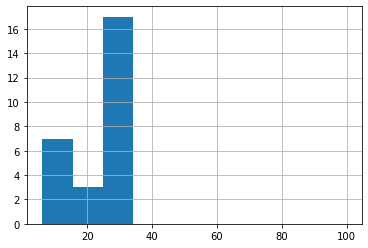

In [127]:
# посмотрим гистограмму для объектов с высотой потолков выше 6м
df['ceiling_height'].hist(bins=10,range=(6,100));

In [128]:
# посмотрим на объекты с высотой потолков от 20 до 40 м
df[(df['ceiling_height']>20)&(df['ceiling_height']<40)]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
355,2,55.2,32.0,8.5,False,False,2,5,2,25.0,False,17,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-12T00:00:00,259.0,3600000.0
3148,3,75.0,53.0,8.0,False,False,2,3,0,32.0,NaN,14,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-12T00:00:00,NaN,2900000.0
4643,2,45.0,30.0,7.0,False,False,2,9,1,25.0,NaN,0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,2018-02-01T00:00:00,181.0,4300000.0
4876,0,25.0,17.0,0.0,False,True,17,25,2,27.0,NaN,7,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-27T00:00:00,28.0,3000000.0
5076,1,30.5,19.5,5.5,False,False,1,5,0,24.0,True,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,2018-10-03T00:00:00,7.0,3850000.0
5246,2,54.0,30.0,9.0,False,False,3,5,2,27.0,NaN,0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-13T00:00:00,540.0,2500000.0
5669,2,50.0,21.3,7.0,False,False,3,9,2,26.0,NaN,4,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,2017-08-08T00:00:00,267.0,4400000.0
5807,2,80.0,41.0,12.0,False,False,13,36,5,27.0,NaN,17,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,2019-01-09T00:00:00,38.0,8150000.0
6246,2,44.4,31.3,5.7,False,False,5,5,0,25.0,NaN,6,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,2019-03-25T00:00:00,NaN,3300000.0
9379,3,42.0,30.0,5.2,False,False,2,5,0,25.0,NaN,5,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,2017-03-26T00:00:00,NaN,3950000.0


Значения высоты потолка болье 10 м выглядят анамальными. Заменим эти значения на медианное значение высоты потолка

In [129]:
df.loc[df['ceiling_height']>10,'ceiling_height'] = df['ceiling_height'].median()

In [130]:
# заменим высоту потолков для объектов, где высота потолков ниже 2м
df.loc[df['ceiling_height']<2,'ceiling_height'] = df['ceiling_height'].median()

In [131]:
# Изучим данные в колонке 'ceiling_height'
data_analysis('ceiling_height')


----------------------------------------
Анализ данных в колонке ceiling_height
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 9019
Процент отсутствующих значений: 38.7%
Число уникальных данных: 166
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    14271.000000
mean         2.726090
std          0.288836
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Значение высоты потолка 8,3м тоже выглядит большим, но возможным. Заменим отсутствующие значения на медианное значение высоты потолка

In [132]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [133]:
# Изучим данные в колонке 'ceiling_height'
data_analysis('ceiling_height')


----------------------------------------
Анализ данных в колонке ceiling_height
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 165
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    23290.000000
mean         2.696624
std          0.229112
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Выводы: пропуски были заполнены, аномальные значения были заменены на медианные значения

In [134]:
# Изучим данные в колонке 'is_apartment'
data_analysis('is_apartment')


----------------------------------------
Анализ данных в колонке is_apartment
----------------------------------------
Тип данных в колонке: object
Количество отсутствующих значений в столбце: 20576
Процент отсутствующих значений: 88.3%
Число уникальных данных: 3
Уникальные значения: [nan False True]
Описание данных в колонке:


count      2714
unique        2
top       False
freq       2669
Name: is_apartment, dtype: object

Для большенства объектов не указан тип is_appartment. Заменим пропуски на False

In [135]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [136]:
# Изучим данные в колонке 'is_apartment'
data_analysis('is_apartment')


----------------------------------------
Анализ данных в колонке is_apartment
----------------------------------------
Тип данных в колонке: bool
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2
Уникальные значения: [False  True]
Описание данных в колонке:


count     23290
unique        2
top       False
freq      23245
Name: is_apartment, dtype: object

Выводы: все пропуски в колонке is_apartment были заполнены

In [137]:
# Изучим данные в колонке 'total_images'
data_analysis('total_images')


----------------------------------------
Анализ данных в колонке total_images
----------------------------------------
Тип данных в колонке: int64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 38
Уникальные значения: [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
Описание данных в колонке:


count    23290.000000
mean         9.858952
std          5.676282
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [138]:
# изменим тип данных на int
df['total_images'] = df['total_images'].astype('int32')

In [139]:
df['total_images'].dtype

dtype('int32')

In [140]:
# Изучим данные в колонке 'locality_name'
data_analysis('locality_name')


----------------------------------------
Анализ данных в колонке locality_name
----------------------------------------
Тип данных в колонке: object
Количество отсутствующих значений в столбце: 49
Процент отсутствующих значений: 0.2%
Число уникальных данных: 364
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count               23241
unique                363
top       Санкт-Петербург
freq                15465
Name: locality_name, dtype: object

In [141]:
# посмотрим объекты с отсутствующими данными по местоположению
df[df['locality_name'].isnull()].head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
1097,3,81.7,50.8,8.8,False,False,2,5,0,3.55,False,3,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,2016-04-15T00:00:00,147.0,8600000.0
2033,3,80.0,42.6,18.6,False,False,2,4,0,2.65,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-30T00:00:00,34.0,5398000.0
2603,1,42.7,15.6,10.7,False,False,3,24,0,2.65,False,20,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,2015-09-20T00:00:00,276.0,3351765.0
2632,2,62.4,33.1,8.2,False,False,21,24,0,2.65,False,2,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,2015-10-11T00:00:00,256.0,5130593.0
3574,2,46.5,30.8,6.5,False,False,5,5,0,2.65,False,10,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,2016-05-28T00:00:00,45.0,4200000.0


Если бы были предоставлены географические координаты объектов, то можно было бы заменить пропуски на название населеных пунктов. По данным о расстоянии до ближайшего аэропорта не возможно точно угадать название населенного пункта т.к в Ленинградсокой области 3 аэропорта. Заменим отсутствующие данные на unknown

In [142]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [143]:
# Изучим данные в колонке 'locality_name' после обработки отсутствующих данных
data_analysis('locality_name')


----------------------------------------
Анализ данных в колонке locality_name
----------------------------------------
Тип данных в колонке: object
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 364
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count               23290
unique                364
top       Санкт-Петербург
freq                15465
Name: locality_name, dtype: object

Отсутствующих значений в колонке locality_name больше нет

In [144]:
#изучим список населенных пунктов
local_name = list(df['locality_name'].unique())

In [145]:
local_name

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

В названиях есть не явные дубликаты: 'посёлок Мурино','поселок Мурино','Мурино'. Приведем названия к одному виду: если встречается 'поселок' перепишем его как 'посёлок'. Если в названии встречается Мурино, то изменим это название на 'Мурино'

In [146]:
# функция для изменения 'поселок' на'посёлок'
def location_rename(name):
    new_list = []
    try:
        name_list = name.split()
        for i in name_list:
            if 'поселок' in i:
                new_list.append('посёлок')
            else:
                new_list.append(i)
        new_name = ' '.join(new_list)
    except:
        new_name = name
    return new_name      
            

In [147]:
# обновим названия населеных пунктов
df['locality_name'] = df['locality_name'].apply(location_rename)

In [148]:
# Обновим названия, где встречается Мурино
boolean_findings = df['locality_name'].str.contains('Мурино')
df['locality_name'] = df['locality_name'].where(boolean_findings==False, 'посёлок Мурино')

In [149]:
#изучим список населенных пунктов
local_name = list(df['locality_name'].unique())
local_name

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'посёлок городского типа Красный Бор',
 'Гатчина',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'посёлок Молодцово',
 'посёлок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'посёлок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'посёлок Торковичи',
 'посёлок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Шлиссельбург',
 'Ни

In [150]:
# Изучим данные в колонке 'locality_name'после обновления
data_analysis('locality_name')


----------------------------------------
Анализ данных в колонке locality_name
----------------------------------------
Тип данных в колонке: object
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 329
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count               23290
unique                329
top       Санкт-Петербург
freq                15465
Name: locality_name, dtype: object

Вывод: отсутствующих значений в колонке locality_name больше нет. Неявные дубликаты были обработаны

In [151]:
# посмотрим описание таблицы после изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23290 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 23290 non-null  int64  
 1   total_area            23290 non-null  float64
 2   living_area           23290 non-null  float64
 3   kitchen_area          23290 non-null  float64
 4   studio                23290 non-null  bool   
 5   open_plan             23290 non-null  bool   
 6   floor                 23290 non-null  int32  
 7   floors_total          23290 non-null  int32  
 8   balcony               23290 non-null  int32  
 9   ceiling_height        23290 non-null  float64
 10  is_apartment          23290 non-null  bool   
 11  total_images          23290 non-null  int32  
 12  locality_name         23290 non-null  object 
 13  airports_nearest      17885 non-null  float64
 14  cityCenters_nearest   17908 non-null  float64
 15  parks_around3000   

В колонках airports_nearest-ponds_nearest, отсутствуют данные, но мы не можем их заполнить, т.к они были заполнены программой (не руками) и здесь не должно быть ошибок. Отсутствующие значения мы не можем заполнить на основе представленных данных в таблице. Оставим значения в этих колонках без изменения

In [152]:
# Изучим данные в колонке 'days_exposition'
data_analysis('days_exposition')


----------------------------------------
Анализ данных в колонке days_exposition
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 3124
Процент отсутствующих значений: 13.4%
Число уникальных данных: 1141
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    20166.000000
mean       181.448230
std        220.089941
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

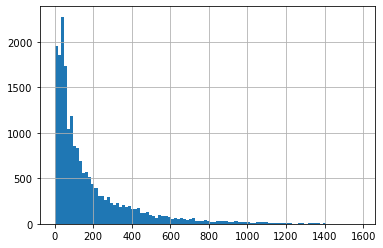

In [153]:
df['days_exposition'].hist(bins=100);

В колонке также есть пропуски данных. Заполнить их корректно мы не можем. Оставим без изменения

Исключим редкие объекты из датасета по условию: days_exposition более 2х лет

In [154]:
df = df.drop(df[df['days_exposition']>2*365].index)

In [155]:
# Проверим кол-во объктов с временем продажи меньше 3х дней
len(df.query('days_exposition<3'))

4

In [156]:
# Исключим редкие объекты из датасета по условию: days_exposition более менее 3х дней
df = df.drop(df[df['days_exposition']<3].index)

In [157]:
print(f'Процент удаленных объектов из исходного датасета: {(1 - len(df)/len(df_init)):.2%}')

Процент удаленных объектов из исходного датасета: 4.87%


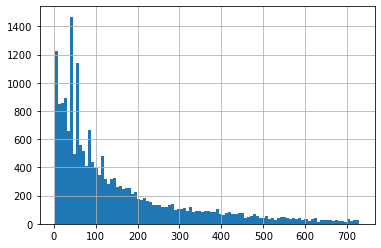

In [158]:
# Гистограмма после удаления редких значений
df['days_exposition'].hist(bins=100);

In [159]:
# Изучим данные в колонке 'last_price'
data_analysis('last_price')


----------------------------------------
Анализ данных в колонке last_price
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2802
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    2.254500e+04
mean     6.378444e+06
std      8.994368e+06
min      1.219000e+04
25%      3.420000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.013000e+08
Name: last_price, dtype: float64

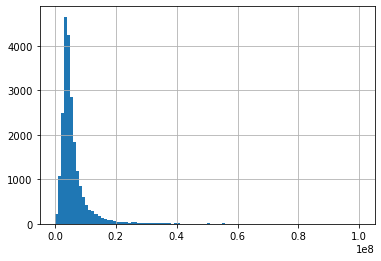

In [160]:
df['last_price'].hist(bins=100, range=(0,10.0e+07));

In [161]:
#посмотрим на объекты с ценой ниже 100 тыс.руб
df[df['last_price']<=100000]

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price
8793,2,109.0,32.0,40.5,False,False,25,25,0,2.75,False,7,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,2019-03-20T00:00:00,8.0,12190.0


Объект выглядит аномальным из-за цены. Удалим его из таблицы

In [162]:
df = df.drop(df[(df['last_price']<=100000)].index)

In [163]:
# Изучим данные в колонке 'last_price' после удаления аномального объекта
data_analysis('last_price')


----------------------------------------
Анализ данных в колонке last_price
----------------------------------------
Тип данных в колонке: float64
Количество отсутствующих значений в столбце: 0
Процент отсутствующих значений: 0.0%
Число уникальных данных: 2801
Число уникальных значений слишком велико для вывода
Описание данных в колонке:


count    2.254400e+04
mean     6.378726e+06
std      8.994467e+06
min      4.300000e+05
25%      3.420000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.013000e+08
Name: last_price, dtype: float64

In [164]:
# Проверим кол-во объектов дороже 100 млн. руб
len(df.query('last_price>100.0e+6'))

29

Исключим редкие объекты из датасета по условию: стоимость объекта более 100 млн.руб

In [165]:
df = df.drop(df[df['last_price']>100.0e+06].index)

In [166]:
#Посмотрим описание данных после изменений
df['last_price'].describe()

count    2.251500e+04
mean     6.164640e+06
std      6.201602e+06
min      4.300000e+05
25%      3.407000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

Вывод: редкие значения удалены. Средняя цена объектов (медиана) составляет 4,6 млн. руб. 

In [167]:
print(f'Процент удаленных объектов из исходного датасета: {(1 - len(df)/len(df_init)):.2%}')

Процент удаленных объектов из исходного датасета: 5.00%


In [168]:
# Посмотрим на информацию о таблице после изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22515 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 22515 non-null  int64  
 1   total_area            22515 non-null  float64
 2   living_area           22515 non-null  float64
 3   kitchen_area          22515 non-null  float64
 4   studio                22515 non-null  bool   
 5   open_plan             22515 non-null  bool   
 6   floor                 22515 non-null  int32  
 7   floors_total          22515 non-null  int32  
 8   balcony               22515 non-null  int32  
 9   ceiling_height        22515 non-null  float64
 10  is_apartment          22515 non-null  bool   
 11  total_images          22515 non-null  int32  
 12  locality_name         22515 non-null  object 
 13  airports_nearest      17267 non-null  float64
 14  cityCenters_nearest   17288 non-null  float64
 15  parks_around3000   

In [169]:
# удалим дубликаты в таблице
df.drop_duplicates(inplace=True)

## Расчёты и добавление результатов в таблицу

Добавим колонку с ценой квадратного метра

In [170]:
df['ratio_area_price'] = df['last_price']/df['total_area']

In [171]:
# Посмотрим описание таблицы после изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22515 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 22515 non-null  int64  
 1   total_area            22515 non-null  float64
 2   living_area           22515 non-null  float64
 3   kitchen_area          22515 non-null  float64
 4   studio                22515 non-null  bool   
 5   open_plan             22515 non-null  bool   
 6   floor                 22515 non-null  int32  
 7   floors_total          22515 non-null  int32  
 8   balcony               22515 non-null  int32  
 9   ceiling_height        22515 non-null  float64
 10  is_apartment          22515 non-null  bool   
 11  total_images          22515 non-null  int32  
 12  locality_name         22515 non-null  object 
 13  airports_nearest      17267 non-null  float64
 14  cityCenters_nearest   17288 non-null  float64
 15  parks_around3000   

Добавим день недели, месяц и год публикации объявления

In [172]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,False,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0,120370.370370
1,1,40.4,18.6,11.0,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079
2,2,56.0,34.3,8.3,False,False,4,5,0,2.65,False,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0,92785.714286
3,3,159.0,54.0,15.0,False,False,9,14,0,2.65,False,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0,408176.100629
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,False,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0,100000.000000


In [173]:
from datetime import datetime

In [174]:
# добавим колонку с днем публикации
df['day'] = df.apply(lambda row: int(datetime.strptime(row['first_day_exposition'], '%Y-%m-%dT%H:%M:%S').strftime("%d")), axis=1)

In [175]:
# добавим колонку с месяцем публикации
df['month'] = df.apply(lambda row: int(datetime.strptime(row['first_day_exposition'], '%Y-%m-%dT%H:%M:%S').strftime("%m")), axis=1)

In [176]:
# добавим колонку с годом публикации
df['year'] = df.apply(lambda row: int(datetime.strptime(row['first_day_exposition'], '%Y-%m-%dT%H:%M:%S').strftime("%Y")), axis=1)

In [177]:
# добавим колонку с днем недели публикации
df['week_day'] = df.apply(lambda row: int(datetime.strptime(row['first_day_exposition'], '%Y-%m-%dT%H:%M:%S').strftime("%w")), axis=1)

In [178]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price,day,month,year,week_day
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,False,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0,120370.370370,7,3,2019,4
1,1,40.4,18.6,11.0,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079,4,12,2018,2
2,2,56.0,34.3,8.3,False,False,4,5,0,2.65,False,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0,92785.714286,20,8,2015,4
3,3,159.0,54.0,15.0,False,False,9,14,0,2.65,False,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0,408176.100629,24,7,2015,5
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,False,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0,100000.000000,19,6,2018,2


Добавим колонку для определения категории этажа квартиры: варианты — первый, последний, другой;

In [179]:
# функция для назначения категории этажа
def floor_categor(floor_value, floor_total_value):
    if floor_value == 1:
        f_cat = 'первый'
    elif floor_value == floor_total_value:
        f_cat = 'последний'
    else:
        f_cat = 'другой'
    return f_cat

In [180]:
# добавление колонки с категорией этажа
df['floor_category'] = df.apply(lambda x: floor_categor(x.floor, x.floors_total), axis=1)

In [181]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price,day,month,year,week_day,floor_category
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,False,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0,120370.370370,7,3,2019,4,другой
1,1,40.4,18.6,11.0,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079,4,12,2018,2,первый
2,2,56.0,34.3,8.3,False,False,4,5,0,2.65,False,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0,92785.714286,20,8,2015,4,другой
3,3,159.0,54.0,15.0,False,False,9,14,0,2.65,False,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0,408176.100629,24,7,2015,5,другой
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,False,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0,100000.000000,19,6,2018,2,другой


Добавим колонки соотношения жилой и общей площади, а также отношения площади кухни к общей

In [182]:
# Соотношение жилой к общей площади
df['ratio_living_total_area'] = df['living_area']/df['total_area']

In [183]:
# Соотношение жилой к общей площади
df['ratio_kitchen_total_area'] = df['kitchen_area']/df['total_area']

In [184]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price,day,month,year,week_day,floor_category,ratio_living_total_area,ratio_kitchen_total_area
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,False,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0,120370.370370,7,3,2019,4,другой,0.472222,0.231481
1,1,40.4,18.6,11.0,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079,4,12,2018,2,первый,0.460396,0.272277
2,2,56.0,34.3,8.3,False,False,4,5,0,2.65,False,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0,92785.714286,20,8,2015,4,другой,0.612500,0.148214
3,3,159.0,54.0,15.0,False,False,9,14,0,2.65,False,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0,408176.100629,24,7,2015,5,другой,0.339623,0.094340
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,False,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0,100000.000000,19,6,2018,2,другой,0.320000,0.410000


In [185]:
# посмотрим описание таблицы после изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22515 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rooms                     22515 non-null  int64  
 1   total_area                22515 non-null  float64
 2   living_area               22515 non-null  float64
 3   kitchen_area              22515 non-null  float64
 4   studio                    22515 non-null  bool   
 5   open_plan                 22515 non-null  bool   
 6   floor                     22515 non-null  int32  
 7   floors_total              22515 non-null  int32  
 8   balcony                   22515 non-null  int32  
 9   ceiling_height            22515 non-null  float64
 10  is_apartment              22515 non-null  bool   
 11  total_images              22515 non-null  int32  
 12  locality_name             22515 non-null  object 
 13  airports_nearest          17267 non-null  float64
 14  cityCe

## Исследовательский анализ данных

4.1 Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [186]:
# Изучим данные в колонке 'total_area' 
df['total_area'].describe()

count    22515.00000
mean        59.46641
std         31.97102
min         13.00000
25%         40.00000
50%         52.00000
75%         69.00000
max        517.00000
Name: total_area, dtype: float64

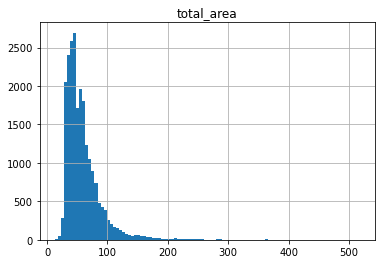

In [187]:
# Построим гистограмму
df['total_area'].hist(bins=100);
plt.title('total_area');

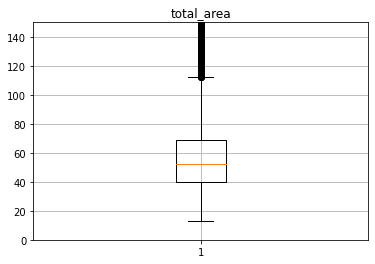

In [188]:
# Построим ящик с усами
plt.boxplot(df['total_area']);
plt.ylim(0,150);
plt.grid()
plt.title('total_area');

In [189]:
print(f'Процент объектов с общей площадью более 115кв.м: {len(df[df["total_area"]>115])/len(df):.1%}')

Процент объектов с общей площадью более 115кв.м: 4.7%


Большая часть значений лежит в диапазоне до 70 кв.м. Объекты с общей площадью более 115 кв.м выглядят как выбросы из-за малочисленности (5% от всех объектов). Однако, их нельзя исключать из анализа. Они представляют собой отдельную категорию объектов с большой площадью.

In [190]:
# Изучим данные в колонке 'rooms' 
df['rooms'].describe()

count    22515.000000
mean         2.061692
std          1.021691
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

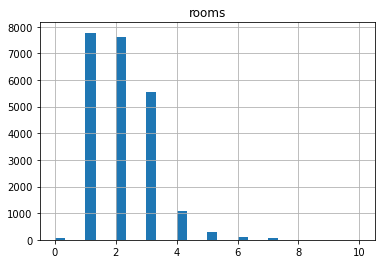

In [191]:
# Построим гистограмму
df['rooms'].hist(bins=30, range=(0,10));
plt.title('rooms');

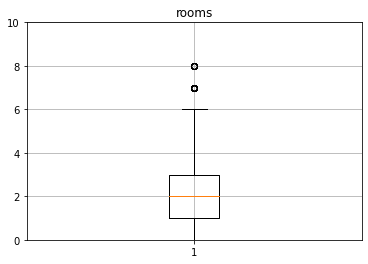

In [192]:
# Построим ящик с усами
plt.boxplot(df['rooms']);
plt.ylim(0,10);
plt.grid()
plt.title('rooms');

In [193]:
# Посмотрим на количество объктов по кол-ву комнат
df_r = df.pivot_table(index='rooms',values='floor',aggfunc='count')
df_r = df_r.reset_index()
df_r['nb_rooms_ratio'] = df_r['floor']*100/df_r['floor'].sum()

In [194]:
df_r

,rooms,floor,nb_rooms_ratio
0,0,55,0.244282
1,1,7773,34.523651
2,2,7617,33.830779
3,3,5531,24.565845
4,4,1096,4.867866
5,5,291,1.292472
6,6,92,0.408616
7,7,52,0.230957
8,8,8,0.035532


Вывод: Большенстов объектов в датасете имеют от 1 до 2х комнат (35% - одна комната, 34% - 2 комнаты). Квартир-студий меньше, чем объектов с 6 комнатами

In [195]:
# Изучим данные в колонке 'ceiling_height' 
df['ceiling_height'].describe()

count    22515.000000
mean         2.693829
std          0.223655
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

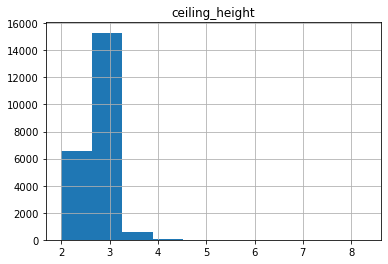

In [196]:
# Построим гистограмму
df['ceiling_height'].hist();
plt.title('ceiling_height');

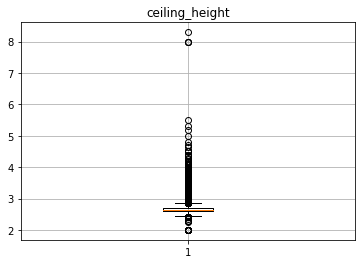

In [197]:
# Построим ящик с усами
plt.boxplot(df['ceiling_height']);
plt.grid()
plt.title('ceiling_height');

Видно, что разброс по высоте потолков большой, но большая часть объектов в таблице имеют высоту потолков не более 3-х метров.

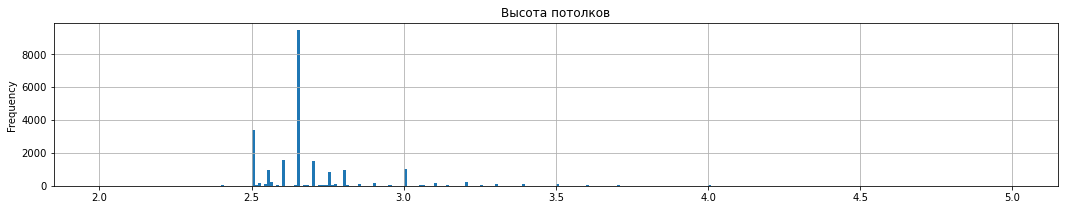

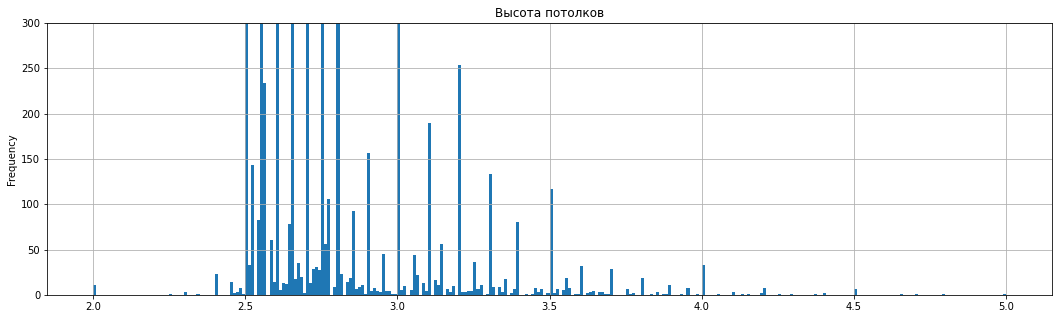

In [198]:
# check
# построим график значений для столбца с высотой потолков
(
    df['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(2,5), grid=True, title='Высота потолков', figsize=(18,3))        
)
plt.show()
(
    df['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(2,5), grid=True, title='Высота потолков', figsize=(18,5))
        .set(ylim = (0, 300))
)
plt.show()

In [199]:
# Изучим данные в колонке 'last_price' 
df['last_price'].describe()

count    2.251500e+04
mean     6.164640e+06
std      6.201602e+06
min      4.300000e+05
25%      3.407000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

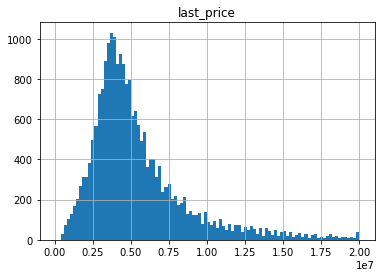

In [200]:
# Построим гистограмму
df['last_price'].hist(bins=100, range=(0,20000000));
plt.title('last_price');

Стоимость большей части квартир не превышает 7млн.руб. Средняя цена (медианное значение) - около 5 млн руб. 

In [201]:
#Посмотрим на объекты с общей площадью более 200 кв.м
df_big = df[df['total_area']>200]

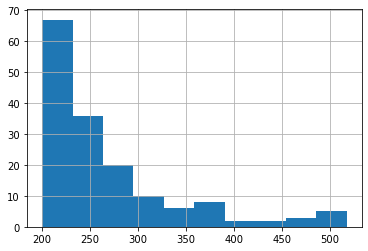

In [202]:
df_big['total_area'].hist();

In [203]:
# Изучим данные в колонке 'total_area' 
df_big['total_area'].describe()

count    159.000000
mean     267.765975
std       72.403082
min      200.300000
25%      218.500000
50%      240.000000
75%      289.000000
max      517.000000
Name: total_area, dtype: float64

Видно, что среди объектов с большой площадью преобладают квартиры с площадью 250 кв.м. Большая часть объектов с большой общей площадью имеют площадь не более 310 кв.м

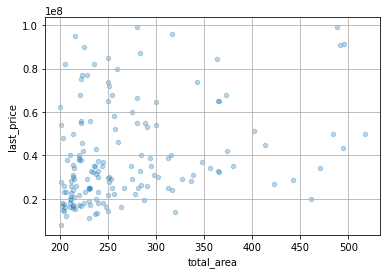

In [204]:
#Посмотрим зависимость жилой площади от общей для объектов с большой площадью
df_big.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3,grid=True);

Посмотрим зависимость жилой площади от общей для объектов общей площадью не более 200 кв.м. 

In [205]:
# Создадим отдельный датафрейм для объектов с общ площадью не более 200 кв.м
df_econom = df[df['total_area']<=200]

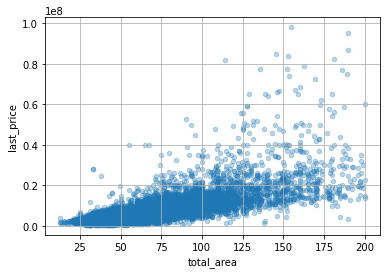

In [206]:
#Посмотрим зависимость жилой площади от общей для объектов с большой площадью
df_econom.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3,grid=True);

На обоих графиках хорошо видны выбросы, которые необходимо исключить для более точной оценки зависимости стоимости от характеристик объектов

In [207]:
# Удалим из общей таблицы объекты с общ плодадью более 390 и менне 450 кв.м и стоимостью более 500 млн руб
df = df.drop(df[(df['total_area']>390)&(df['total_area']<450)&(df['last_price']>500000000)].index)

In [208]:
# Удалим из общей таблицы объекты с общ плодадью менне 200 кв.м и стоимостью более 150 млн руб
df = df.drop(df[(df['total_area']<=200)&(df['last_price']>150000000)].index)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22515 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rooms                     22515 non-null  int64  
 1   total_area                22515 non-null  float64
 2   living_area               22515 non-null  float64
 3   kitchen_area              22515 non-null  float64
 4   studio                    22515 non-null  bool   
 5   open_plan                 22515 non-null  bool   
 6   floor                     22515 non-null  int32  
 7   floors_total              22515 non-null  int32  
 8   balcony                   22515 non-null  int32  
 9   ceiling_height            22515 non-null  float64
 10  is_apartment              22515 non-null  bool   
 11  total_images              22515 non-null  int32  
 12  locality_name             22515 non-null  object 
 13  airports_nearest          17267 non-null  float64
 14  cityCe

<div class="alert alert-anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Для выполнения проекта требуется удалить редкие значения из датасета, что считать редкостью  на нашем проекте — выбор за тобой
        
совет:
        
мы не боремся с выбросами на данном проекте... т.к. у нас совершенно неоднородная выборка по объектам, 
        
если бы у нас в таблице были бы только однокомнатные квартиры из определенного района массовой застройки, тогда да, мы бы боролись с выбросами традиционными способами, при нашем многообразии населенных пунктов, многокомнатности такие подходы не работают... т.е. они работают, но это усложнит твой проект — придется разбить и объединить записи нашей таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем только выполнять все остальные пункты на каждой отдельной выборке
        
Остается другой подход — убираем редкие значения и следим за количеством потерь... 
        
Критичный уровень очистки таблицы равен 10% от первоначального кол-ва всех записей, оптимальный 5%

In [210]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных, средних, медианных и максимальных показателях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
)

,rooms,total_area,ceiling_height,days_exposition,last_price
count,22515.000000,22515.00000,22515.000000,19396.000000,2.251500e+04
min,0.000000,13.00000,2.000000,3.000000,4.300000e+05
mean,2.061692,59.46641,2.693829,151.329501,6.164640e+06
median,2.000000,52.00000,2.650000,90.000000,4.600000e+06
max,8.000000,517.00000,8.300000,729.000000,9.900000e+07


In [211]:
print(f'Процент удаленных объектов из исходного датасета: {(1 - len(df)/len(df_init)):.2%}')

Процент удаленных объектов из исходного датасета: 5.00%


Изучим зависимость стоимости объектов от размеров объектов. Разделим объкты на объекты на две группы: общ площадь до 200 кв.м и более 200 кв.м

In [212]:
#Таблица для бъектов с общей площадью более 200 кв.м после удаления строк
df_big = df[df['total_area']>200]

In [213]:
# Таблица для бъектов с общ площадью не более 200 кв.м
df_econom = df[df['total_area']<=200]

In [214]:
#создадим таблицу для необходимых характеристик
df_big_a_r_c_p = df_big.loc[:,['rooms', 'total_area', 'ceiling_height', 'last_price']]

In [215]:
# корреляция для объектов с большой площадью
df_big_a_r_c_p.corr()

,rooms,total_area,ceiling_height,last_price
rooms,1.000000,0.088935,0.281109,-0.189248
total_area,0.088935,1.000000,-0.019943,0.298923
ceiling_height,0.281109,-0.019943,1.000000,0.160326
last_price,-0.189248,0.298923,0.160326,1.000000


In [216]:
#создадим отдельную таблицу для объектов с площадью до 200 кв.м
df_e_a_r_c_p = df_econom.loc[:,['rooms', 'total_area', 'ceiling_height', 'last_price']]

In [217]:
# корреляция для объектов с площадью менее 200 кв.м
df_e_a_r_c_p.corr()

,rooms,total_area,ceiling_height,last_price
rooms,1.000000,0.787614,0.190526,0.434787
total_area,0.787614,1.000000,0.355721,0.732333
ceiling_height,0.190526,0.355721,1.000000,0.352958
last_price,0.434787,0.732333,0.352958,1.000000


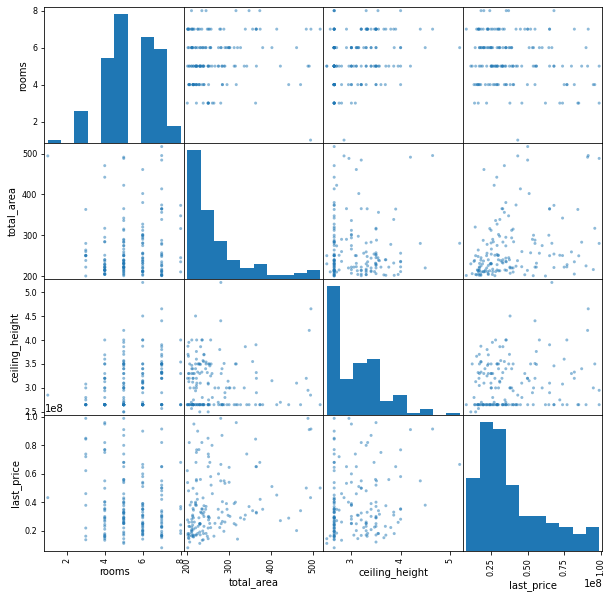

In [218]:
pd.plotting.scatter_matrix(df_big_a_r_c_p, figsize=(10,10));

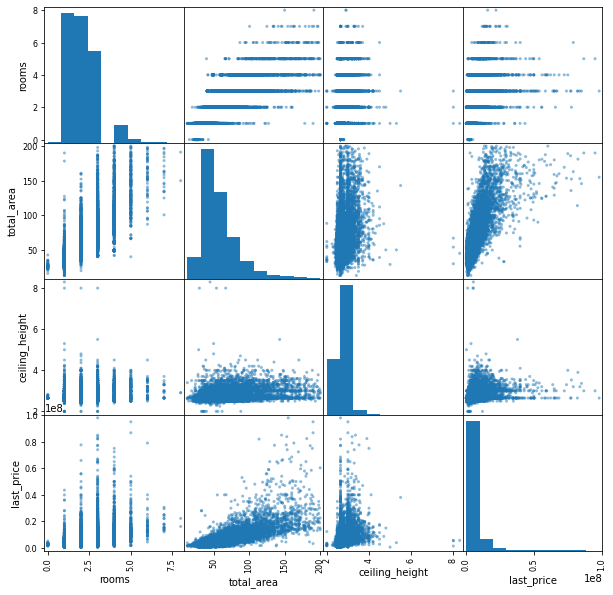

In [219]:
pd.plotting.scatter_matrix(df_e_a_r_c_p, figsize=(10,10));

Вывод: для объектов с общ площадь до 200 кв.м зависимость стоимости от характеристик (площадь, число комнат) намного более выражена, чем для объектов с большой площадью.

Для объектов с общ площадью до 200 кв.м корреляция стоимости и площади - сильная (0,7). Для объектов с большой площадью - связь есть, но не большая (корреляция 0,51)

4.2 Изучим время продажи квартиры. 

In [220]:
# Изучим данные в колонке 'days_exposition' 
df['days_exposition'].describe()

count    19396.000000
mean       151.329501
std        156.430181
min          3.000000
25%         44.000000
50%         90.000000
75%        208.000000
max        729.000000
Name: days_exposition, dtype: float64

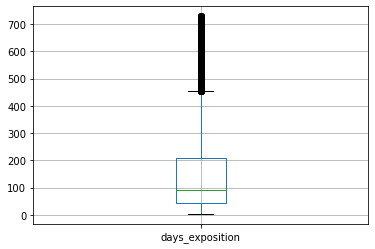

In [221]:
# Построим ящик с усами
df.boxplot(column='days_exposition');

In [222]:
print(f'Среднее время продажи составляет: {int(df["days_exposition"].mean())} дней')

Среднее время продажи составляет: 151 дней


In [223]:
print(f'Медианное время продажи составляет: {int(df["days_exposition"].median())} дней')

Медианное время продажи составляет: 90 дней


In [224]:
print(f'Максимальное время продажи: {int(df["days_exposition"].max()/360)} года')

Максимальное время продажи: 2 года


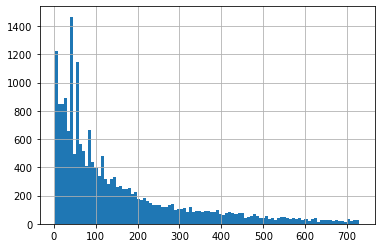

In [225]:
# Построим гиаграмму
df['days_exposition'].hist(bins=100);

В среднем, объекты продаются 3-5 месяцев. Практически все объекты были проданы не более чем за 450 дней

In [226]:
#создадим для двух колонок и посмотрим корреляцию 
df_time = df.loc[:,['last_price','days_exposition']]

In [227]:
# корреляция
df_time.corr()

,last_price,days_exposition
last_price,1.000000,0.104372
days_exposition,0.104372,1.000000


Можно сделать вывод, что связи стоимости с продолжительностью продажи - нет. Скорее всего зависимость не видна, т.к не дорогие объекты в посёлках или деревнях очень долго продаются. Для оценки зависимости время продажи/цена лучше разбить объекты по местоположению.

4.3 Изучим зависимость стоимости квартиры от удалености от центра, зависимость стоимости от этажа объекта, а также изучим зависимость от даты размещения.

In [228]:
# Корреляция между стоимостью и расстоянием от центра
df['last_price'].corr(df['cityCenters_nearest'])

-0.29845060510787585

Зависимость слабая. Отрицательная корреляция говорит о том, что с уменьшением расстояния от центра стоимость увеличивается.

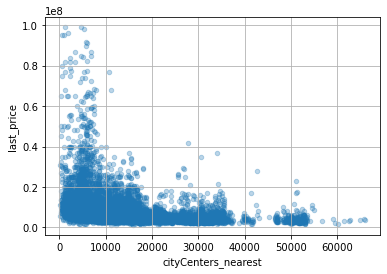

In [229]:
#зависимость стоимости от расстояния от центра на графике
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3,grid=True);

In [230]:
df.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price,day,month,year,week_day,floor_category,ratio_living_total_area,ratio_kitchen_total_area
0,3,108.0,51.0,25.0,False,False,8,16,0,2.70,False,20,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,13000000.0,120370.370370,7,3,2019,4,другой,0.472222,0.231481
1,1,40.4,18.6,11.0,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079,4,12,2018,2,первый,0.460396,0.272277
2,2,56.0,34.3,8.3,False,False,4,5,0,2.65,False,10,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,5196000.0,92785.714286,20,8,2015,4,другой,0.612500,0.148214
3,3,159.0,54.0,15.0,False,False,9,14,0,2.65,False,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,64900000.0,408176.100629,24,7,2015,5,другой,0.339623,0.094340
4,2,100.0,32.0,41.0,False,False,13,14,0,3.03,False,2,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,10000000.0,100000.000000,19,6,2018,2,другой,0.320000,0.410000


In [231]:
#Изучим влияние расстояния от центра для объектов в Санкт-Петербурге.
df_SP = df[(df['locality_name']=='Санкт-Петербург')]
df_SP = df_SP.loc[:,['rooms', 'total_area','last_price', 'ratio_area_price', 'cityCenters_nearest']]
df_SP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14918 entries, 0 to 23697
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rooms                14918 non-null  int64  
 1   total_area           14918 non-null  float64
 2   last_price           14918 non-null  float64
 3   ratio_area_price     14918 non-null  float64
 4   cityCenters_nearest  14859 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 699.3 KB


In [232]:
# заполним пропуски медианным значением
df_SP['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [233]:
df_SP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14918 entries, 0 to 23697
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rooms                14918 non-null  int64  
 1   total_area           14918 non-null  float64
 2   last_price           14918 non-null  float64
 3   ratio_area_price     14918 non-null  float64
 4   cityCenters_nearest  14918 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 699.3 KB


In [234]:
# добавим колонку с расстоянием в км от центра
df_SP['cityCenters_nearest_km'] = (df_SP['cityCenters_nearest']/1000).round()

In [235]:
df_SP.head()

,rooms,total_area,last_price,ratio_area_price,cityCenters_nearest,cityCenters_nearest_km
0,3,108.0,13000000.0,120370.370370,16028.0,16.0
2,2,56.0,5196000.0,92785.714286,13933.0,14.0
3,3,159.0,64900000.0,408176.100629,6800.0,7.0
4,2,100.0,10000000.0,100000.000000,8098.0,8.0
7,2,71.6,7915000.0,110544.692737,11634.0,12.0


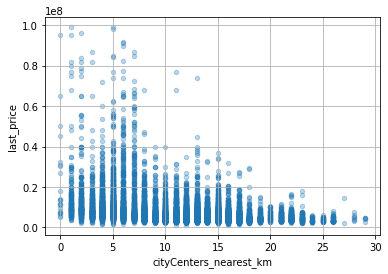

In [236]:
#зависимость стоимости от расстояния от центра на графике
df_SP.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.3,grid=True);

In [237]:
# Изменим тип данных в колонке cityCenters_nearest_km на int
df_SP['cityCenters_nearest_km'] = df_SP['cityCenters_nearest_km'].astype('int')

In [238]:
# Определим среднюю цену для каждого километра
df_SP_cent = df_SP.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
df_SP_cent

,last_price
cityCenters_nearest_km,
0,2.358995e+07
1,1.612788e+07
2,1.495298e+07
3,1.093796e+07
4,1.123100e+07
5,1.282974e+07
6,1.332580e+07
7,1.344689e+07
8,9.215449e+06


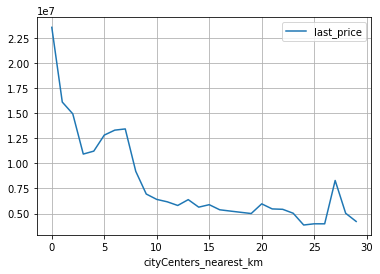

In [239]:
# Построим график для визуализации зависимости средней стоимости от расстояния до центра
df_SP_cent.plot();
plt.grid()

Видно, что в радиусе от 0 до 12-13км цена сильно меняется. С увеличением расстояния от 12км - цена колеблется около 5-6 млн.руб за объект

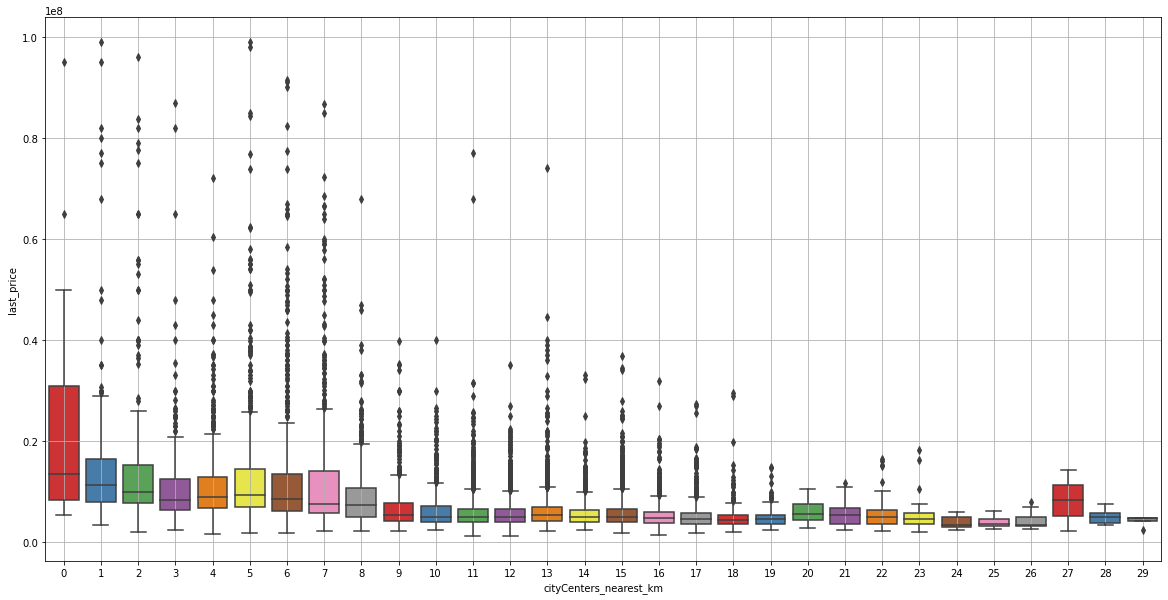

In [240]:
# Построим ящики с усами для визуализации зависимости цены от расстояния до цента
plt.figure(figsize=(20,10))
sns.boxplot(data=df_SP, x='cityCenters_nearest_km', y = 'last_price', palette="Set1")
plt.grid()
plt.show();

Из графика видно, что в центре города (радиус 0км) самые дорогие объекты и разброс цены здеь значительно больше, чем у объектов на других радиусах. 


In [241]:
# Корреляция между стоимостью и расстоянием от центра для объктов, расположенных в Санкт-Петербурге
df_SP['last_price'].corr(df_SP['cityCenters_nearest_km'])

-0.3641711244743689

Корреляция слабая (меньше 0,5), однако из графиков видно, что в области до 8 км от центра, цена объектов значительно выше, чем у объектов за пределами этого радиуса. За пределами 15км - расстояние практически не имеет влияния на стоимость.

Можно сказать, что область до 5км от центра - является центром города, т.к здесь высокая стоимость объектов и стоимость к этой границе - растет

Изучим объекты в центре города (в радиусе 5км)

In [242]:
df_SP5 = df[(df['locality_name']=='Санкт-Петербург')&(df['cityCenters_nearest']<=5000)]

In [243]:
#посмотрим на описание общей площади
df_SP5['total_area'].describe()

count    1863.000000
mean       93.975829
std        50.700353
min        13.000000
25%        61.000000
50%        83.000000
75%       112.200000
max       517.000000
Name: total_area, dtype: float64

In [244]:
#посмотрим на описание количества комнат
df_SP5['rooms'].describe()

count    1863.000000
mean        2.971551
std         1.342420
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: rooms, dtype: float64

In [245]:
#посмотрим на описание высоты потолков
df_SP5['ceiling_height'].describe()

count    1863.000000
mean        2.986753
std         0.371636
min         2.400000
25%         2.650000
50%         3.000000
75%         3.200000
max         5.300000
Name: ceiling_height, dtype: float64

Получается, что большенство объектов в центре Санкт-Петербурга имеют площадь 80-96 кв.м, число комнат - 2-3, высоту потолков - 3 метра. 

Это значительно отличается от данных по всей таблице, где в среднем площадь объектов составляет около 50кв.м, число комнат 2 и высота потолков 2,7м

Изучим зависимость стоимости от этажа объекта

In [246]:
# Построим сводную таблицу для всей таблицы
df.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
floor_category,,
другой,4800000.0,16617
первый,3900000.0,2758
последний,4300000.0,3140


Вывод: у объектов на первом этаже, в среднем (по медиане) стоимость ниже, чем у объектов на последнем или других этажах. Стоимость объектов, расположенных ни на первом и ни на последнем этаже - выше чем у объектов или на первом или на последнем этажах. 

In [247]:
# Построим сводную таблицу для центра Санкт-Петербурга
df_SP5.pivot_table(index='floor_category', values='last_price', aggfunc='median').sort_values(by=['last_price'])

,last_price
floor_category,
первый,6925000.0
последний,9400000.0
другой,9999500.0


Вывод: Также как и для всей таблицы - самая высокая стоимость у объектов ни на первом и ни на последнем этаже. Однако, стоимость объектов на первом этаже значительно ниже чем на других этажах. Стоимость на последнем этаже не сильно отличается от стоимостьи на других этажах (исключая первый).

Изучим зависимость стоимости от даты размещения объявления

In [248]:
# Построим сводную таблицу для определения медианной стоимости в зависимости от дня недели
df.pivot_table(index='week_day', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
week_day,,
0,4500000.0,1620
1,4610000.0,3432
2,4700000.0,3946
3,4661705.0,3754
4,4600000.0,4072
5,4550000.0,3844
6,4550000.0,1847


Стоимость объектов, опубликованных в середине недели -выше, чем у объектов опубликованных в начале и конце недели. Так же, число объявлений в середине недели выше, чем в конце недели

In [249]:
# Построим сводную таблицу для определения медианной стоимости в зависимости от месяца
df.pivot_table(index='month', values='last_price', aggfunc='median').sort_values(by=['last_price'])

,last_price
month,
6,4400000.0
5,4530000.0
8,4550000.0
10,4550000.0
1,4600000.0
7,4600000.0
3,4645000.0
2,4650000.0
9,4650000.0


Стоимость объектов, опубликованных в апреле выше, чем у объектов, опубликованных в другие месяцы. Стоимость начиная с начала года растет. Минимальная стоимость - в июне. Скорее всего из-за отпусков

In [250]:
# Построим сводную таблицу для определения медианной стоимости в зависимости от года публикации
df.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
year,,
2014,9050000.0,58
2015,5100000.0,777
2016,4500000.0,2479
2017,4500000.0,8039
2018,4581000.0,8345
2019,5050000.0,2817


Стоимость объектов, опубликованных в 2014 - самая высокая (по медиане), самая низкая - в 2016-2017. Начиная с 2017 - стоимость начинает расти. Скорее всего, такая тенденция связана с кризисом, произошедшим в 2014 году. Однако, количество объявлений в 2014 значительно ниже, чем в 2015-2019 годах

4.4 Определим 10 населенных пунктов с наибольшим числом объявлений и изучим эти объекты

In [251]:
#Построим сводную таблицу
df_pop_local = df.pivot_table(index='locality_name',values='rooms', aggfunc='count').sort_values(by=['rooms'],ascending=False)[:10]
df_pop_local.columns = ['ads_number']

In [252]:
df_pop_local

,ads_number
locality_name,
Санкт-Петербург,14918
посёлок Мурино,541
посёлок Шушары,425
Всеволожск,373
Пушкин,352
Колпино,331
посёлок Парголово,319
Гатчина,289
деревня Кудрово,269


In [253]:
# Определим среднюю стоимость квадратного метра в зависимости от местоположения (за среднее возьмем медианное значение)
df_local_price = df.pivot_table(index='locality_name',values='ratio_area_price', aggfunc='median').sort_values(by=['ratio_area_price'],ascending=False)
df_local_price

,ratio_area_price
locality_name,
посёлок Лисий Нос,113728.348730
Санкт-Петербург,104414.215686
Зеленогорск,101666.666667
Пушкин,100000.000000
Кудрово,99781.727471
...,...
посёлок Тёсово-4,12931.034483
посёлок Совхозный,12629.129129
деревня Вахнова Кара,11688.311688


In [254]:
# Добавим колонку со средней стоимостью квадратного метра
df_pop_local = df_pop_local.join(df_local_price)

In [255]:
df_pop_local = df_pop_local.reset_index()

In [256]:
df_pop_local

,locality_name,ads_number,ratio_area_price
0,Санкт-Петербург,14918,104414.215686
1,посёлок Мурино,541,85582.255083
2,посёлок Шушары,425,76829.268293
3,Всеволожск,373,65789.473684
4,Пушкин,352,100000.000000
5,Колпино,331,74657.534247
6,посёлок Парголово,319,91346.153846
7,Гатчина,289,67187.500000
8,деревня Кудрово,269,91803.278689
9,Выборг,222,58133.213989


Создадим два датасета: один для объектов в Санкт-Петербурге, второй для всех объектов в населенных пунктах в строках 1-9

In [257]:
# Датасет для Санкт-Петербурга
df_SP0 = df[df['locality_name']=='Санкт-Петербург']

In [258]:
#список населенных пунктов с наибольшим кол-вом объявлений
df_pop_local_list = list(df_pop_local['locality_name'].unique())
df_pop_local_list[1:]

['посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [259]:
# Датасет для популярных населенных пунктов исключая Санкт-Петербург
df_PC = df[df['locality_name'].isin(df_pop_local_list[1:])]

In [260]:
df_PC.head(5)

,rooms,total_area,living_area,kitchen_area,studio,open_plan,floor,floors_total,balcony,ceiling_height,is_apartment,total_images,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,last_price,ratio_area_price,day,month,year,week_day,floor_category,ratio_living_total_area,ratio_kitchen_total_area
1,1,40.40,18.60,11.00,False,False,1,11,2,2.65,False,7,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,3350000.0,82920.792079,4,12,2018,2,первый,0.460396,0.272277
6,1,37.30,10.60,14.40,False,False,6,26,1,2.65,False,6,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,2017-11-02T00:00:00,155.0,3700000.0,99195.710456,2,11,2017,4,другой,0.284182,0.386059
8,1,33.16,15.43,8.81,False,False,26,27,0,2.65,False,20,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-23T00:00:00,189.0,2900000.0,87454.764777,23,5,2018,3,другой,0.465320,0.265682
14,1,36.00,17.00,8.00,False,False,1,6,0,2.65,False,1,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,2016-06-23T00:00:00,203.0,4400000.0,122222.222222,23,6,2016,4,первый,0.472222,0.222222
20,3,80.00,48.00,12.00,False,False,11,27,2,2.70,False,12,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,2017-09-28T00:00:00,74.0,6120000.0,76500.000000,28,9,2017,4,другой,0.600000,0.150000


In [261]:
#изменим названия населенных пунктов на pop_cities_region
df_PC['locality_name'] = 'pop_cities_region'

C:\Users\Anna\AppData\Local\Temp/ipykernel_14840/2248576170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PC['locality_name'] = 'pop_cities_region'


In [262]:
# проверим уникальные значения
df_PC['locality_name'].unique()

array(['pop_cities_region'], dtype=object)

In [263]:
# Теперь объеденим два датасета и сделаем сравнение данных по объектам в Санк-Петербурге и других 9 популярных населенных пунктах
df_SP0_PCR = pd.concat([df_SP0, df_PC,])

In [264]:
df_SP0_PCR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18039 entries, 0 to 23682
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rooms                     18039 non-null  int64  
 1   total_area                18039 non-null  float64
 2   living_area               18039 non-null  float64
 3   kitchen_area              18039 non-null  float64
 4   studio                    18039 non-null  bool   
 5   open_plan                 18039 non-null  bool   
 6   floor                     18039 non-null  int32  
 7   floors_total              18039 non-null  int32  
 8   balcony                   18039 non-null  int32  
 9   ceiling_height            18039 non-null  float64
 10  is_apartment              18039 non-null  bool   
 11  total_images              18039 non-null  int32  
 12  locality_name             18039 non-null  object 
 13  airports_nearest          16261 non-null  float64
 14  cityCe

Сравним цены в Санкт-Петербурге (СП) и других популярных городах (ПГ) по году объявления

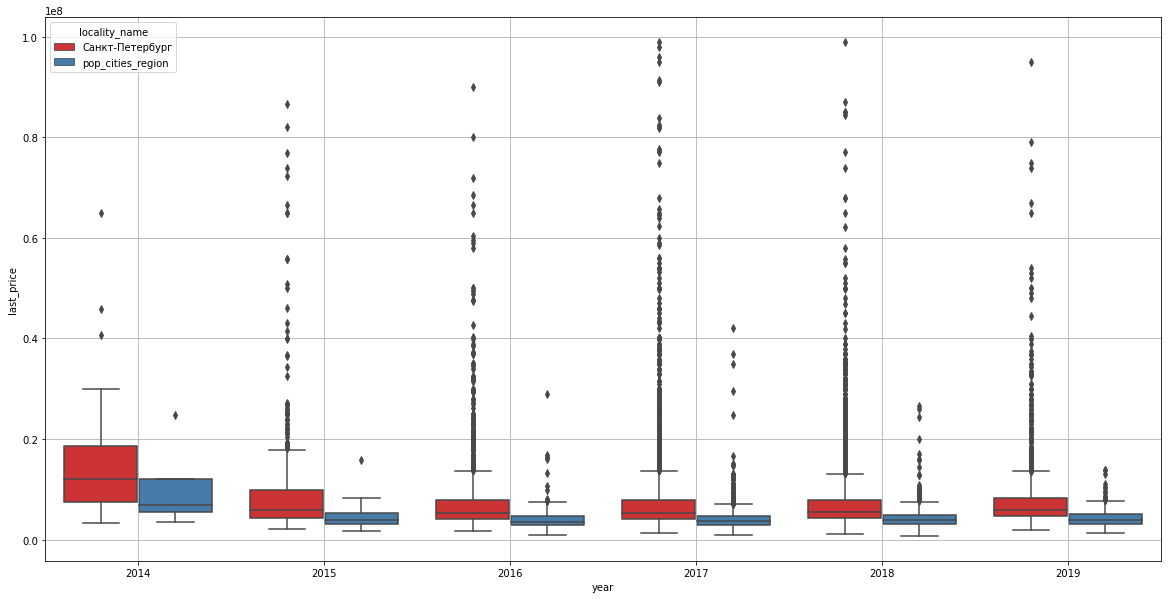

In [265]:
# Построим графики с усами
plt.figure(figsize=(20,10))
sns.boxplot(data=df_SP0_PCR, x='year', y = 'last_price', hue='locality_name', palette="Set1")
plt.grid()
plt.show();

In [266]:
# Построим сводную таблицу
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='year', aggfunc='median')

year,2014,2015,2016,2017,2018,2019
locality_name,,,,,,
pop_cities_region,6950000.0,3800000.0,3550000.0,3602000.0,3800000.0,3990000.0
Санкт-Петербург,12036000.0,5959322.0,5300000.0,5300000.0,5480000.0,5900000.0


Вывод: тренд изменения средней стоимости не сильно отличается. Для объектов в ПГ средняя стоимость начала расти с 2016, а для объектов в СП - стоимость начала расти только в 2017

Сравним цены в Санкт-Петербурге (СП) и других популярных городах (ПГ) по месяцу объявления

In [267]:
# Построим сводную таблицу
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='month', aggfunc='median').T

locality_name,pop_cities_region,Санкт-Петербург
month,,
1,3750000.0,5600000.0
2,3725000.0,5500000.0
3,3700000.0,5600000.0
4,3675000.0,5500000.0
5,3580000.0,5400000.0
6,3681288.0,5300000.0
7,3650000.0,5350000.0
8,3750000.0,5400000.0
9,3675000.0,5500000.0


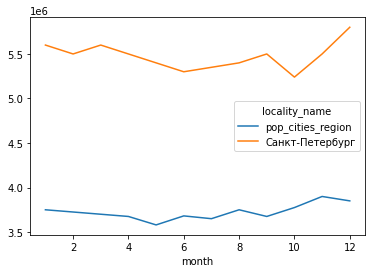

In [268]:
# Посмотрим зависимость на графике
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='month', aggfunc='median').T.plot();

Вывод: Для объектов в СП видно что летом в месяцы отпусков цены значительно ниже чем в другие месяцы. Для объектов в ПГ такой явной зависимости нет

Сравним цены в Санкт-Петербурге (СП) и других популярных городах (ПГ) по кол-ву комнат

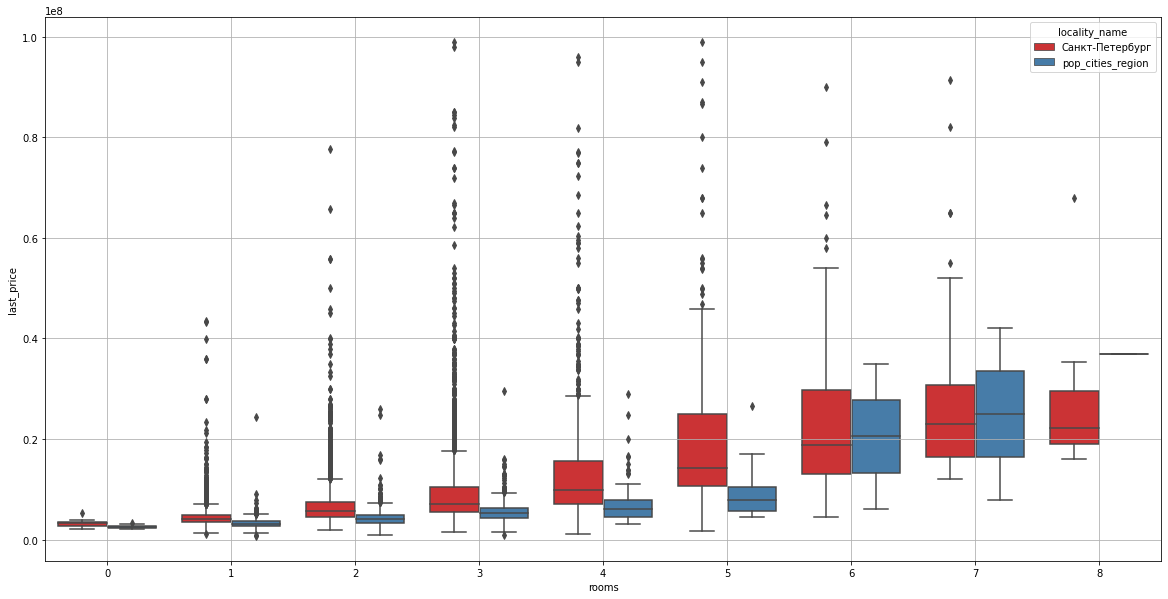

In [269]:
# Построим графики с усами
plt.figure(figsize=(20,10))
sns.boxplot(data=df_SP0_PCR, x='rooms', y = 'last_price', hue='locality_name', palette="Set1")
plt.grid()
plt.show();

In [270]:
# Построим сводную таблицу
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='rooms', aggfunc='median').T

locality_name,pop_cities_region,Санкт-Петербург
rooms,,
0,2500000.0,3255000.0
1,3150000.0,4085000.0
2,4130000.0,5600000.0
3,5200000.0,7100000.0
4,6025000.0,9940000.0
5,7829000.0,14250000.0
6,20550000.0,18888500.0
7,24950000.0,22950000.0
8,36900000.0,22190000.0


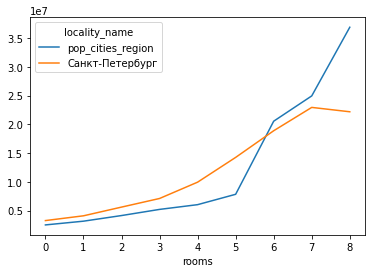

In [271]:
# Посмотрим зависимость на графике
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='rooms', aggfunc='median').T.plot();

Вывод: Средняя стоимость квартиры выше в СП для объектов от 0 до 5 комнат. И ниже, для объектов с большим кол-вом комнат

Сравним цены в Санкт-Петербурге (СП) и других популярных городах (ПГ) по стоимости квадратного метра

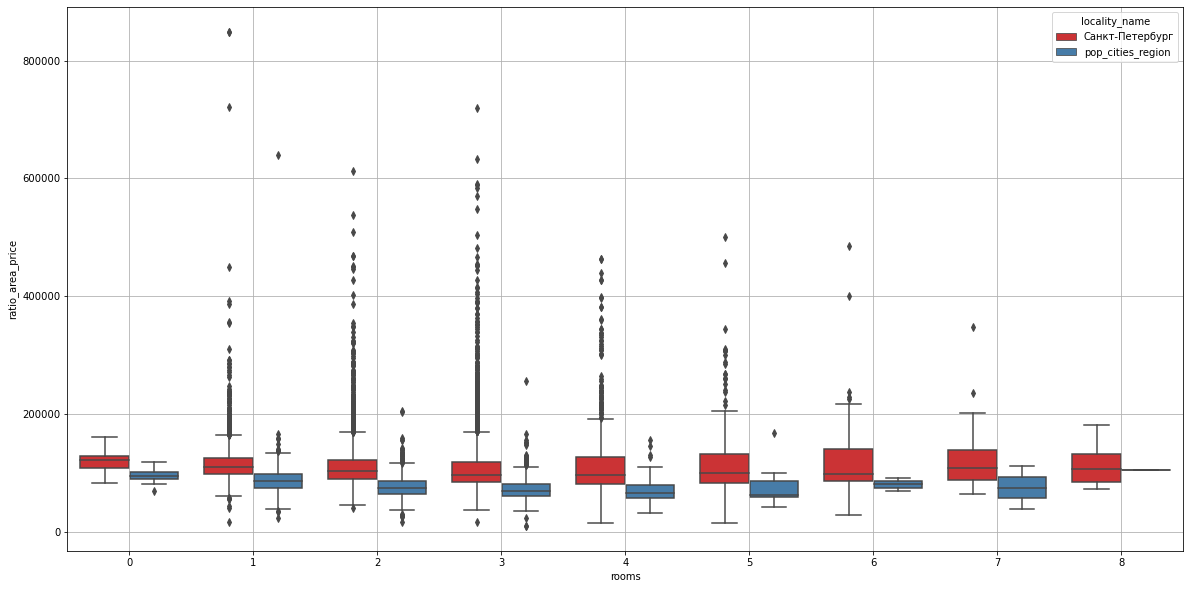

In [272]:
# Построим графики с усами
plt.figure(figsize=(20,10))
sns.boxplot(data=df_SP0_PCR, x='rooms', y = 'ratio_area_price', hue='locality_name', palette="Set1")
plt.grid()
plt.show();

In [273]:
# Построим сводную таблицу
df_SP0_PCR.pivot_table(index='locality_name', values='ratio_area_price', columns='rooms', aggfunc='median').T

locality_name,pop_cities_region,Санкт-Петербург
rooms,,
0,95785.440613,122222.222222
1,87694.490752,110526.315789
2,75193.567600,103488.372093
3,69620.253165,96842.105263
4,66448.140900,97841.282062
5,63981.042654,99960.031974
6,81110.102843,99527.037182
7,75752.710288,108398.727466
8,106187.050360,107333.333333


In [274]:
# Посмотрим зависимость цены квадратного метра на графике
sq_price = df_SP0_PCR.pivot_table(index='locality_name', values='ratio_area_price', columns='rooms', aggfunc='median').T

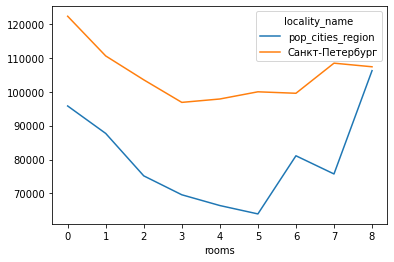

In [275]:
sq_price.plot();

Вывод: Средняя цена квадратного метра в СП выше, чем в ПГ, несмотря на то, что стоимость 6-8комнатных объектов в ПГ выше. Следовательно, средняя площадь 6-8 комнатных квартир в ПГ выше, чем в СП. Проверим это

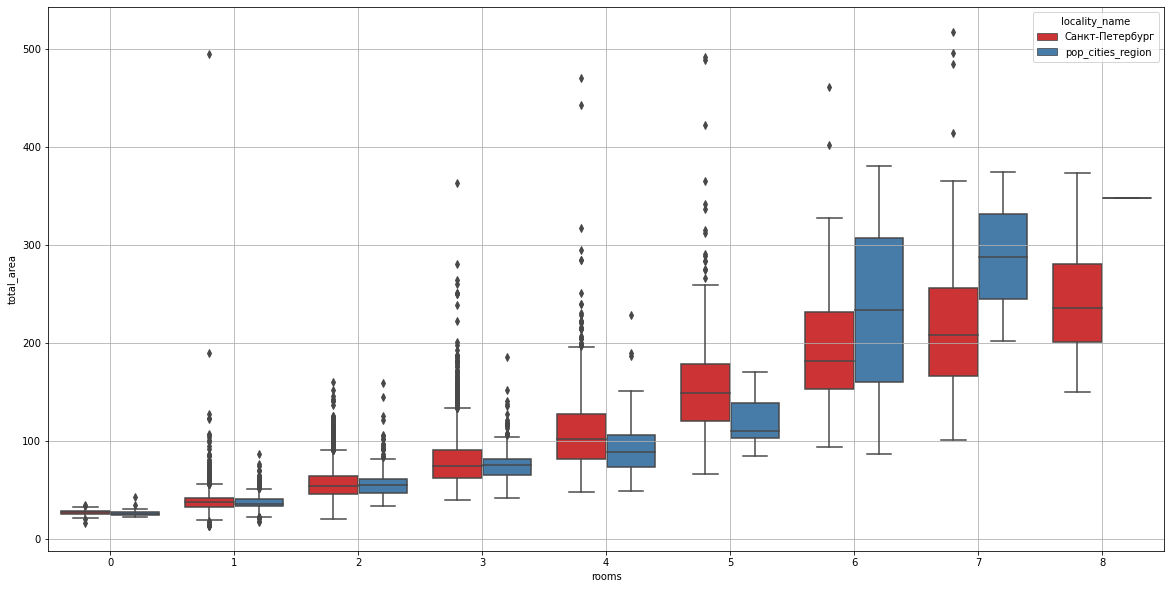

In [276]:
# Построим графики с усами
plt.figure(figsize=(20,10))
sns.boxplot(data=df_SP0_PCR, x='rooms', y = 'total_area', hue='locality_name', palette="Set1")
plt.grid()
plt.show();

Сравним объекты по общей площади в зависимости от кол-ва комнат

In [277]:
# Построим сводную таблицу
df_SP0_PCR.pivot_table(index='locality_name', values='total_area', columns='rooms', aggfunc='median').T

locality_name,pop_cities_region,Санкт-Петербург
rooms,,
0,25.41,27.30
1,36.02,37.20
2,54.70,54.00
3,75.00,74.50
4,88.60,101.90
5,110.00,148.30
6,233.50,181.75
7,287.75,208.20
8,347.50,235.00


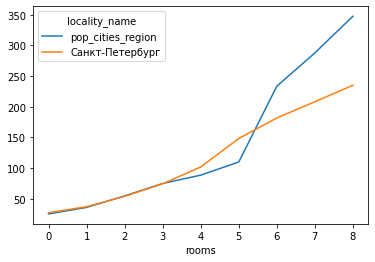

In [278]:
# Посмотрим зависимость на графике
df_SP0_PCR.pivot_table(index='locality_name', values='total_area', columns='rooms', aggfunc='median').T.plot();

Вывод: размеры квартир примерно одинаковые, если число комнат не привышает 3. Общая площадь объектов в ПГ значительно больше чем в СП если число комнато больше 5х 

Сравним цены в Санкт-Петербурге (СП) и других популярных городах (ПГ) по зависимости стоимости от этажа объекта

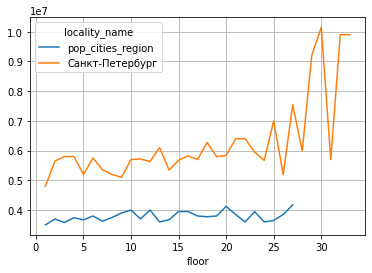

In [279]:
# Посмотрим зависимость на графике
df_SP0_PCR.pivot_table(index='locality_name', values='last_price', columns='floor', aggfunc='median').T.plot();
plt.grid()

Вывод: Зависимость цены от этажа объектв в ПГ не сильно выражена. В СП зависимость выражена ярче - для объектов, расположенных выше 26 этажа - стоимость значетельно больше, чем на других этажах

In [280]:
# check TOP-10

(
    df
    .groupby('locality_name')['ratio_area_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False)


,count,mean
locality_name,,
Санкт-Петербург,14918,113020.614703
Пушкин,352,103101.361760
деревня Кудрово,269,92488.855203
посёлок Парголово,319,89951.812672
посёлок Мурино,541,85651.405232
посёлок Шушары,425,78513.802901
Колпино,331,75412.782304
Всеволожск,373,68739.028010
Гатчина,289,68728.970288


In [281]:
# Выделим объекты с самой высокой стоимостью квадратного метра (более 100 тыс за кв.м)
df_local_price[df_local_price['ratio_area_price']>=100000]

,ratio_area_price
locality_name,
посёлок Лисий Нос,113728.348730
Санкт-Петербург,104414.215686
Зеленогорск,101666.666667
Пушкин,100000.000000


In [282]:
# Выделим объекты с низкой стоимостью квадратного метра (менеее 15 тыс за кв.м)
df_local_price[df_local_price['ratio_area_price']<=15000]

,ratio_area_price
locality_name,
посёлок станции Лужайка,15000.000000
посёлок Житково,14956.275202
деревня Ям-Тесово,13711.553373
деревня Сижно,13709.677419
деревня Выскатка,13207.547170
посёлок Тёсово-4,12931.034483
посёлок Совхозный,12629.129129
деревня Вахнова Кара,11688.311688
посёлок станции Свирь,11481.481481


## Общий вывод

Мы изучили данные в таблице. Для более точной оценки стоимости жилья и времени продажи, необходимо разбить данные по типам населенных пунктов. Если изучать всю таблицу, то по ней слабо прослеживается корреляция стоимости от всех параметров объектов.
Но если изучать отдельно объекты по таким критериям как площадь до 200 кв.м (один тип объектов), более 200 квм. -другой тип объектов, столица области или посёлок-деревня - еще один тип объектов, то в каждой группе зависимость начинает проявляться.

По сравнению объектов в Санкт-Петербурге и других населенных пунктах с большим кол-ом бъявлений можно сделать выводы, что:

1/ в зависимости от года объявления, тренд изменения средней стоимости не сильно отличается для СП и ПГ. Стоимость объектов снижается начиная с 2014. Рост начался для ПГ в 2016, а для СП только в 2017году

2/ в зависимости от месяца публикации объявления: для объектов в СП есть явная зависимость от месяца - цены ниже в "обычные" месяцы отпусков (июнь, август), чем в другие месяцы. В ПГ цена не сильно изменяется в зависимости от месяца

3/ в зависимости от кол-ва комнат: средняя стоимость квартиры выше в СП для объектов от 0 до 5 комнат. И ниже чем в ПГ для объектов с большим кол-вом комнат (6-8 комнат)

4/ средняя цена квадратного метра в СП выше, чем в ПГ, несмотря на то, что стоимость 6-8комнатных объектов в ПГ выше. 

5/ общая площадь объектов в СП и ПГ примерно одинаковые для объектов с одинаковым кол-ом комнат, если число комнат не привышает 3. общая площадь объектов в ПГ значительно больше чем в СП если число комнато больше 5х 

6/ зависимость средней цены от этажа объектв в СП сильно выражена. Для объектов в ПГ - зависимость не сильно выражена
